Notebook 5

# More EDA

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import chi2_contingency
from sklearn.feature_extraction import FeatureHasher

import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [2]:
%load_ext kedro.ipython

[10/23/23 20:32:03] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:139
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\hado.                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/23/23 20:32:04] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\framework\session\session.py:266: FutureWarning: ConfigLoader                  
                             will be deprecated in Kedro 0.19. Please use the OmegaConfigLoader                    
                             instead. To consult the documentation for OmegaConfigLoader, see here:                
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\io\data_catalog.py:300: FutureWarning: Defining the 'layer'                    
                             attribute at the top level is deprecated and will be removed in Kedro                 
                             0.19.0. Please move 'layer' inside the 'metadata' -> 'kedro-viz'                      
                             attributes. See                                                                       
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project hado                                                     __init__.py:108

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:109
                             'pipelines'                                                                           

[10/23/23 20:32:05] INFO     Registered line magic 'run_viz'                                        __init__.py:115

In [3]:
df = catalog.load('hado_final')

                    INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:492

In [4]:
df.describe().T

count         mean        std     min     25%     50%  \
n_estancias      4013.0    14.981560  19.471153     0.0     4.0     9.0   
n_visitas        4013.0     6.008472   6.959248     0.0     2.0     4.0   
ps_ecog          4013.0     3.005482   1.328036     0.0     2.0     4.0   
barthel          4013.0    40.294044  31.347269     0.0    20.0    30.0   
gds_fast         4013.0     1.207326   2.454242     0.0     0.0     0.0   
eva_ing          4013.0     2.365064  12.684001     0.0     0.0     0.0   
tiene_sedacion   4013.0     0.172689   0.378025     0.0     0.0     0.0   
morfina          4013.0     0.018191   0.133658     0.0     0.0     0.0   
midazolam        4013.0     0.017443   0.130932     0.0     0.0     0.0   
buscapina        4013.0     0.017194   0.130010     0.0     0.0     0.0   
haloperidol      4013.0     0.002741   0.052290     0.0     0.0     0.0   
levomepromazina  4013.0     0.001744   0.041734     0.0     0.0     0.0   
year             4013.0  2019.904062   1.786321  2017.0  2018.0  2020.0   

                    75%     max  
n_estancias        18.0   304.0  
n_visitas           7.0    99.0  
ps_ecog             4.0     4.0  
barthel            60.0   100.0  
gds_fast            0.0     7.0  
eva_ing             0.0   100.0  
tiene_sedacion      0.0     1.0  
morfina             0.0     1.0  
midazolam           0.0     1.0  
buscapina           0.0     1.0  
haloperidol         0.0     1.0  
levomepromazina     0.0     1.0  
year             2022.0  2022.0

In [5]:
df.describe(include=['object']).T

count unique                          top  freq
h_procedencia               4013     17                      clinico  2240
hospital_category           4013      3                     Santiago  2747
s_procedencia               4013    100                           no  1225
procedencia_category        4013     10                        Otros  1700
diagnostico                 4013   1513                          ITU   173
diagnosis_category          4013     10                        Otros  1149
motivo_ing                  4013    560             control sintomas  1229
ingreso_category            4013      4                     Sintomas  1402
motivo_alta                 4013     90                 fin cuidados  2380
alta_category               4013      4                        Otros  2473
fecha_alta                  4013    213                      unknown  3253
ap                          4013      2                           no  2773
paliativo_onc_noc           4013      3                           no  2488
paliativo_no_onc_noc        4013      3                           no  2889
fiebre                      4013      3                           no  3481
disnea                      4013      3                           no  2824
dolor                       4013      2                           no  2559
delirium                    4013      3                           no  3351
sedacion                    4013     26                           no  3320
p_terminal                  4013      3                  desconocido  2466
agonia                      4013      3                           no  2450
ast_anorx                   4013      2                           no  2453
cronico_reag                4013      3                  desconocido  1550
trato_antibiotico           4013      3                  desconocido  1550
transfusion                 4013      3                           no  2400
paracentesis                4013      3                           no  2392
agudo_estable               4013      3                           no  2030
toracocentesis              4013      3                           no  2458
fe_iv                       4013      3                  desconocido  2959
ps_ecog_classification      4013      5             Encamado el 100%  2220
barthel_classification      4013      5            Dependencia total  1855
gds_fast_classification     4013      8   No realizado o desconocido  3171
otros_complicaciones        4013    373                           no  2374
otros                       4013     42                           no  2811
otros_1                     4013    163                  desconocido  2464
otros_2                     4013     52                  desconocido  2465
otros_category              4013      3              No especificado  3914
categorized_combined_otros  4013      5  Desconocido/No especificado  3164
medico                      4013     14             fernandez benito   797
ayuntamiento                4013     34                  desconocido  1551
latitude                    4013     34                  desconocido  1551
longitude                   4013     34                  desconocido  1551

Checking Nans in the Dataset:


(
    <Axes: title={'center': 'Count of Nan in Every Columns'}>,
    h_procedencia                 0.0
hospital_category             0.0
s_procedencia                 0.0
procedencia_category          0.0
diagnostico                   0.0
diagnosis_category            0.0
motivo_ing                    0.0
ingreso_category              0.0
motivo_alta                   0.0
alta_category                 0.0
fecha_alta                    0.0
ap                            0.0
n_estancias                   0.0
n_visitas                     0.0
paliativo_onc_noc             0.0
paliativo_no_onc_noc          0.0
fiebre                        0.0
disnea                        0.0
dolor                         0.0
delirium                      0.0
sedacion                      0.0
p_terminal                    0.0
agonia                        0.0
ast_anorx                     0.0
cronico_reag                  0.0
trato_antibiotico             0.0
transfusion                   0.0
paracentesis

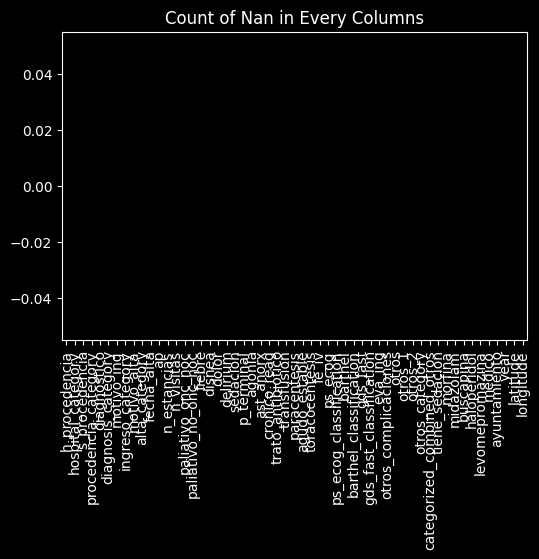

In [6]:
plt.figure(figsize=(6,4))
plt.title('Count of Nan in Every Columns')
df.isnull().sum().plot(kind='bar', color = "blue"), round(df.isnull().sum()/len(df)*100,2)

First analyze Numerical Data

In [7]:
num_data = df.select_dtypes(exclude=['object']).copy()
num_data.head()

n_estancias  n_visitas  ps_ecog  barthel  gds_fast  eva_ing  \
0           21         10        4       30         0        0   
1           24          8        4        0         0        0   
2           14          6        4       40         0        0   
3            1          1        1       90         0        0   
4            2          1        4       30         0       70   

   tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
0               0        0          0          0            0   
1               0        0          0          0            0   
2               0        0          0          0            0   
3               0        0          0          0            0   
4               0        0          0          0            0   

   levomepromazina  year  
0                0  2017  
1                0  2017  
2                0  2017  
3                0  2017  
4                0  2017

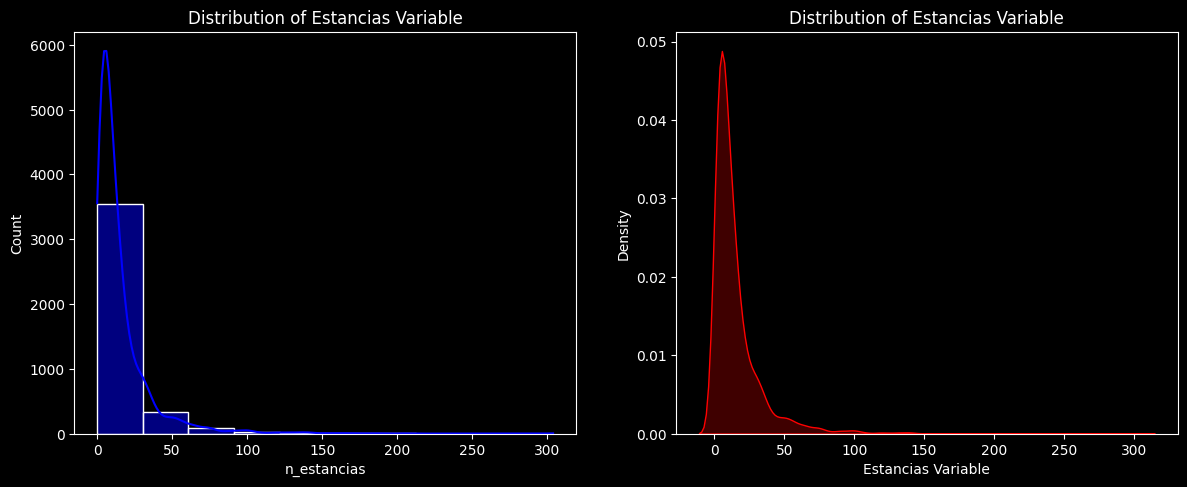

In [8]:
plt.figure(figsize=(22,24))
temp = num_data['n_estancias']
x = pd.Series(temp,name='Estancias Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10, color= "blue", kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Estancias Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of Estancias Variable')
plt.show()

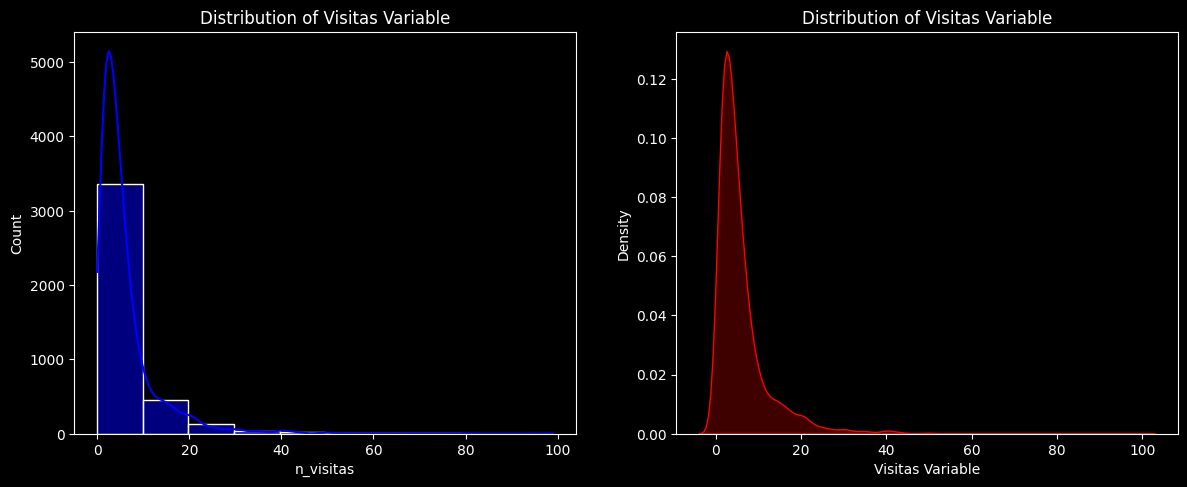

In [9]:
plt.figure(figsize=(22,24))
temp = num_data['n_visitas']
x = pd.Series(temp,name='Visitas Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Visitas Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of Visitas Variable')
plt.show()

In [10]:
num_data['ps_ecog'].unique()

array([4, 1, 2, 3, 0], dtype=int64)

In [11]:
num_data[num_data['ps_ecog'] == 1000]

Empty DataFrame
Columns: [n_estancias, n_visitas, ps_ecog, barthel, gds_fast, eva_ing, tiene_sedacion, morfina, midazolam, buscapina, haloperidol, levomepromazina, year]
Index: []

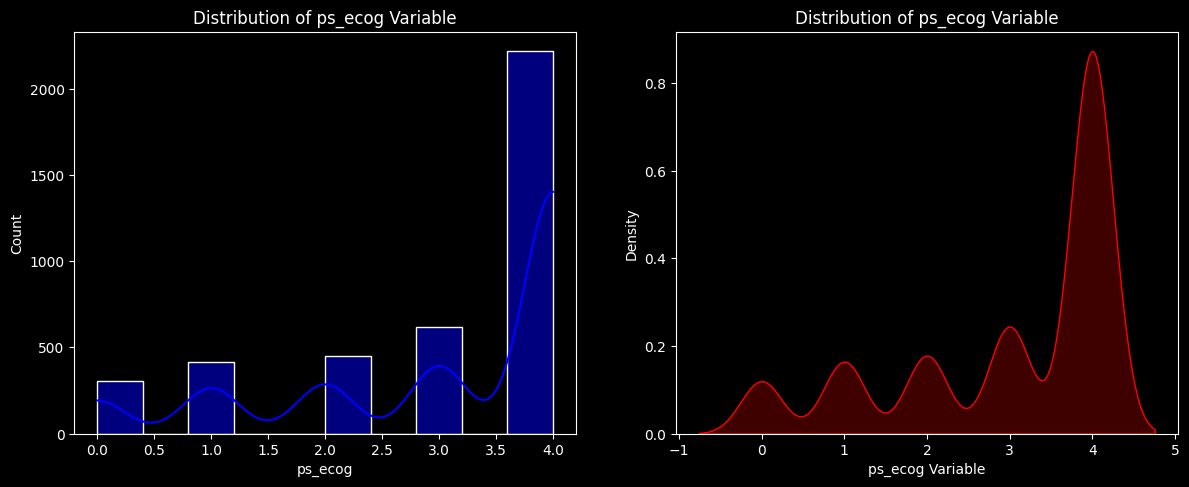

In [12]:
plt.figure(figsize=(22,24))
temp = num_data['ps_ecog']
x = pd.Series(temp,name='ps_ecog Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of ps_ecog Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of ps_ecog Variable')
plt.show()

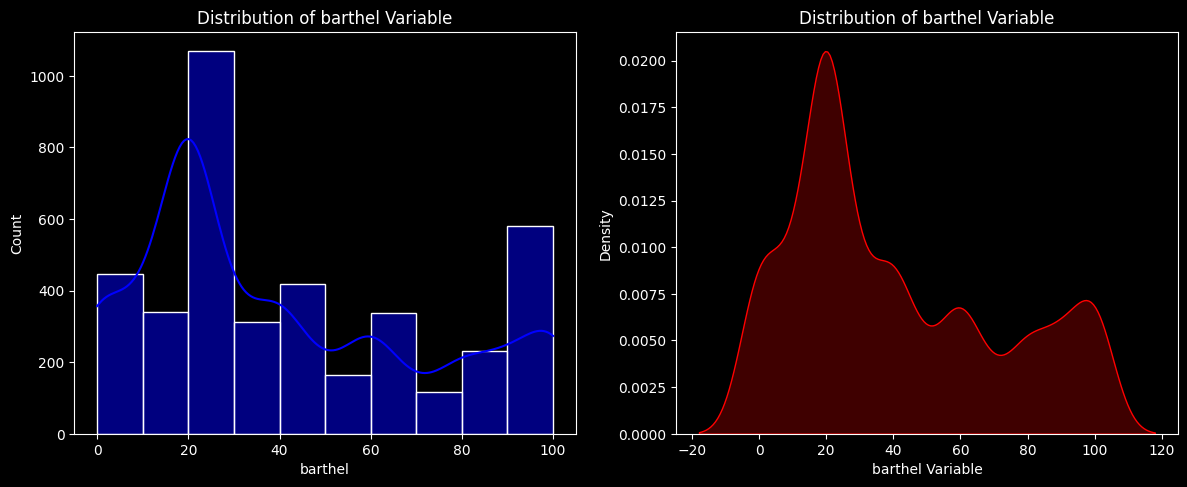

In [13]:
plt.figure(figsize=(22,24))
temp = num_data['barthel']
x = pd.Series(temp,name='barthel Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of barthel Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of barthel Variable')
plt.show()

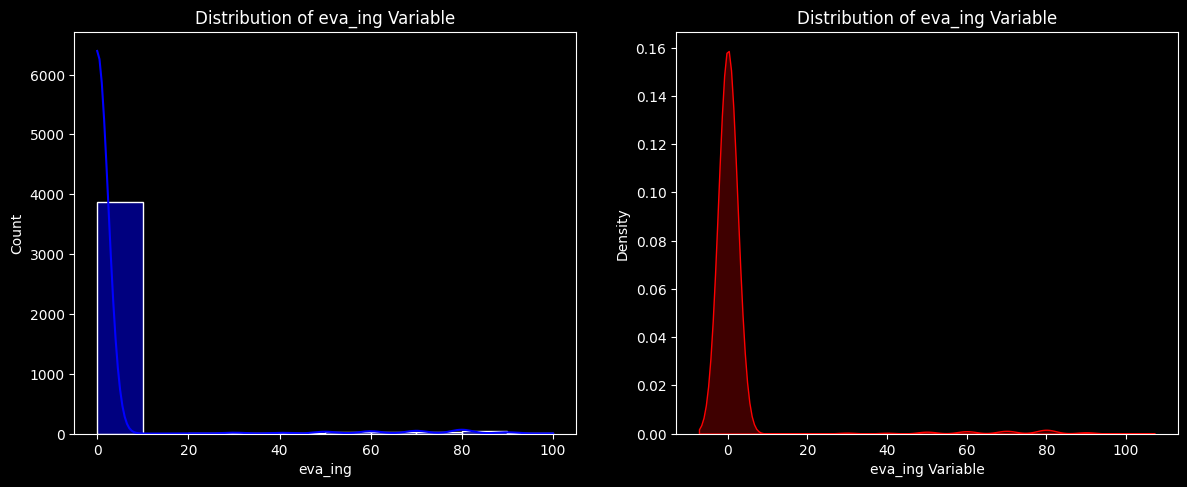

In [14]:
plt.figure(figsize=(22,24))
temp = num_data['eva_ing']
x = pd.Series(temp,name='eva_ing Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of eva_ing Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of eva_ing Variable')
plt.show()

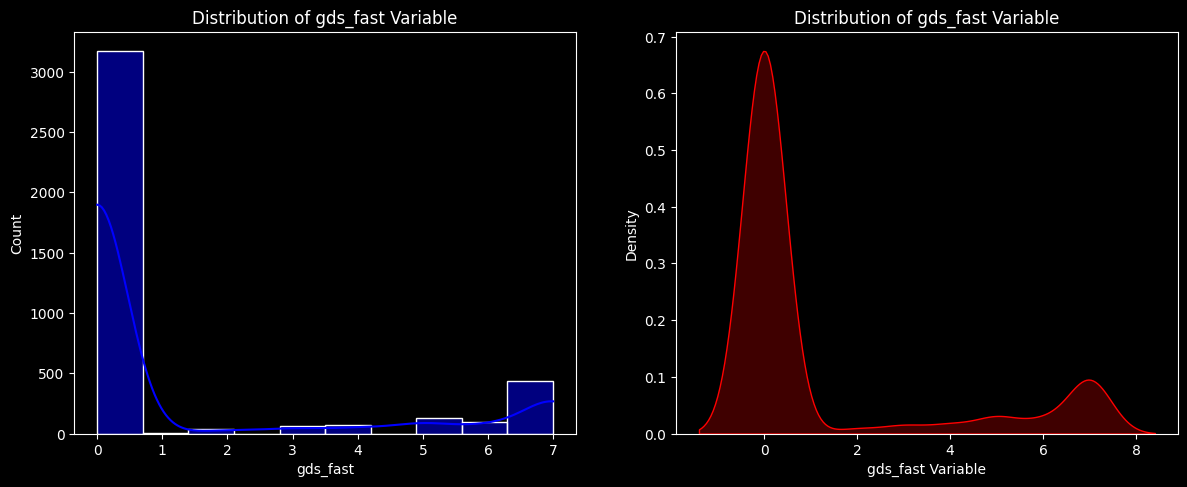

In [15]:
plt.figure(figsize=(22,24))
temp = num_data['gds_fast']
x = pd.Series(temp,name='gds_fast Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of gds_fast Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of gds_fast Variable')
plt.show()

Detect Outliers

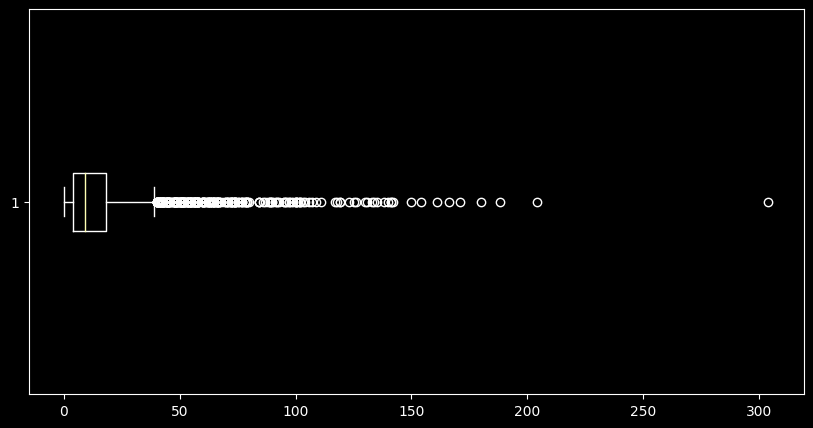

In [16]:
plt.figure(figsize=(10, 5))
plt.boxplot(num_data['n_estancias'],vert=False)
plt.show()

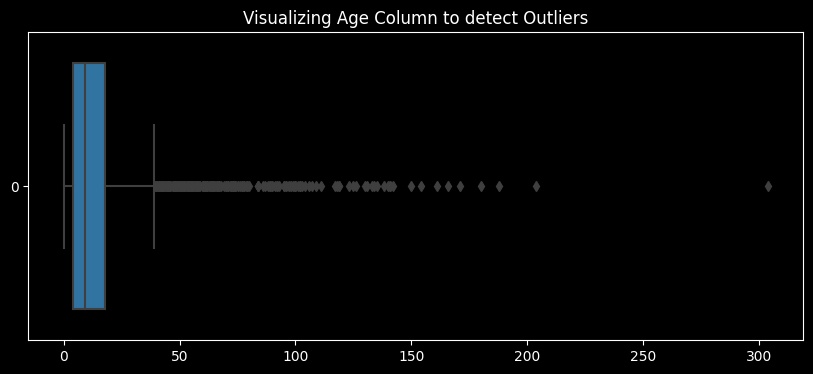

In [17]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(num_data['n_estancias'],color= "tab:blue", orient="h")
ax.set_title('Visualizing Age Column to detect Outliers')
plt.show()

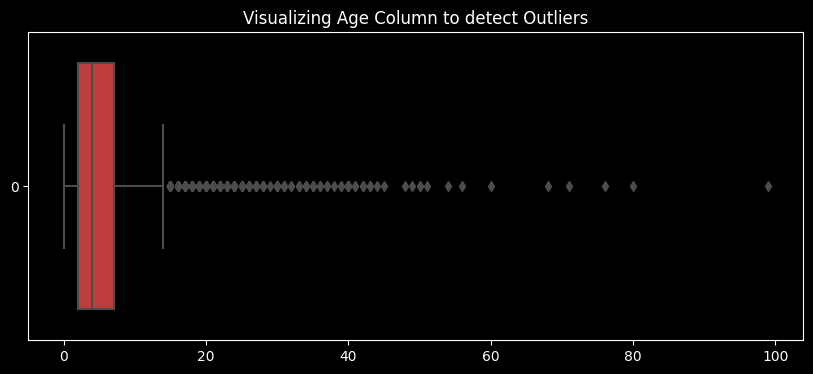

In [18]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(num_data['n_visitas'],color= "tab:red", orient="h")
ax.set_title('Visualizing Age Column to detect Outliers')
plt.show()

Deteccion de outliers con quantile

In [19]:
Q1 = num_data['n_estancias'].quantile(0.25)
print("Primer Cuartil", Q1,"\n")

Q3 = num_data['n_estancias'].quantile(0.75)
print("Tercer Cuartil", Q3,"\n")

IQR = Q3 -Q1
print("Rango Intercuartil", IQR,"\n")

Mediana = num_data['n_estancias'].median()
print("Mediana", Mediana,"\n")

Valor_min = num_data['n_estancias'].min()
print("Valor mínimo", Valor_min,"\n")

Valor_max = num_data['n_estancias'].max()
print("Valor máximo", Valor_max,"\n")


Primer Cuartil 4.0 

Tercer Cuartil 18.0 

Rango Intercuartil 14.0 

Mediana 9.0 

Valor mínimo 0 

Valor máximo 304 



In [20]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_Calculado \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_Calculado \n", BS_Calculado)

BI_Calculado 
 -17.0
BS_Calculado 
 39.0


Ubicación Outliers

In [21]:
ubicacion_outliers = (num_data['n_estancias'] < BI_Calculado) | (num_data['n_estancias'] > BS_Calculado)
print(f"\n Ubicación de Outliers \n{ubicacion_outliers}")


 Ubicación de Outliers 
0       False
1       False
2       False
3       False
4       False
        ...  
4008    False
4009    False
4010    False
4011    False
4012    False
Name: n_estancias, Length: 4013, dtype: bool


In [22]:
outliers = num_data[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
       n_estancias  n_visitas  ps_ecog  barthel  gds_fast  eva_ing  \
21            103         21        4       20         0        0   
24             69         31        4       60         0        0   
58             92         40        4       20         0       90   
61             49         14        2       60         0      100   
106            98         35        4       10         0        0   
...           ...        ...      ...      ...       ...      ...   
3920           65         50        2       90         0        0   
3936           79         39        4       20         0        0   
3937           60         24        4       40         0        0   
3949           42         16        3       30         0        0   
3993          171         37        2       70         0        0   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
21                 0        0          0          0            0   
24           

In [23]:
outliers_ordenados = outliers.sort_values("n_estancias")
outliers_ordenados

n_estancias  n_visitas  ps_ecog  barthel  gds_fast  eva_ing  \
2464           40          6        3       60         0        0   
559            40         14        4       40         0        0   
373            40         16        4       20         0       80   
3436           40         30        1       80         0        0   
331            40         14        4       20         0        0   
...           ...        ...      ...      ...       ...      ...   
3993          171         37        2       70         0        0   
789           180         40        4       20         0        0   
3301          188         39        2        0         0        0   
1972          204         51        3       40         0        0   
735           304         60        2       50         0        0   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
2464               0        0          0          0            0   
559                0        0          0          0            0   
373                1        1          1          1            0   
3436               0        0          0          0            0   
331                1        0          0          0            0   
...              ...      ...        ...        ...          ...   
3993               0        0          0          0            0   
789                0        0          0          0            0   
3301               1        0          0          0            0   
1972               0        0          0          0            0   
735                0        0          0          0            0   

      levomepromazina  year  
2464                0  2021  
559                 0  2017  
373                 0  2017  
3436                0  2022  
331                 0  2017  
...               ...   ...  
3993                0  2022  
789                 0  2018  
3301                0  2022  
1972                0  2020  
735                 0  2018  

[294 rows x 13 columns]

In [24]:
ubicacion_sin_out = (num_data['n_estancias'] >= BI_Calculado) & (num_data['n_estancias'] <= BS_Calculado)
sin_out = num_data[ubicacion_sin_out]
sin_out

n_estancias  n_visitas  ps_ecog  barthel  gds_fast  eva_ing  \
0              21         10        4       30         0        0   
1              24          8        4        0         0        0   
2              14          6        4       40         0        0   
3               1          1        1       90         0        0   
4               2          1        4       30         0       70   
...           ...        ...      ...      ...       ...      ...   
4008           15          7        4       40         0        0   
4009            6          4        3       30         4        0   
4010           21          7        4       20         0        0   
4011           11          3        4       20         7        0   
4012           11          6        4        0         0        0   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
0                  0        0          0          0            0   
1                  0        0          0          0            0   
2                  0        0          0          0            0   
3                  0        0          0          0            0   
4                  0        0          0          0            0   
...              ...      ...        ...        ...          ...   
4008               1        0          0          0            0   
4009               0        0          0          0            0   
4010               0        0          0          0            0   
4011               1        0          0          0            0   
4012               1        0          0          0            0   

      levomepromazina  year  
0                   0  2017  
1                   0  2017  
2                   0  2017  
3                   0  2017  
4                   0  2017  
...               ...   ...  
4008                0  2022  
4009                0  2022  
4010                0  2022  
4011                0  2022  
4012                0  2022  

[3719 rows x 13 columns]

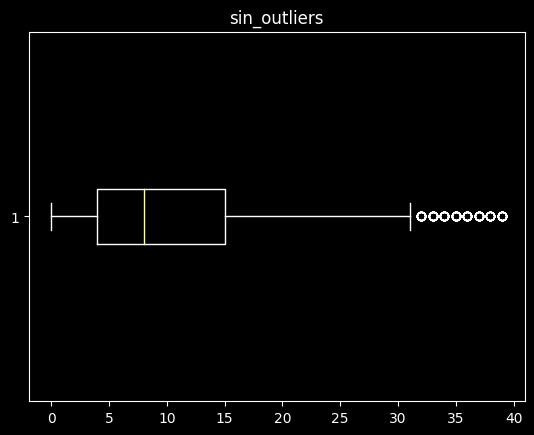

In [25]:
plt.title("sin_outliers")
plt.boxplot(sin_out["n_estancias"], vert=False)
plt.show();

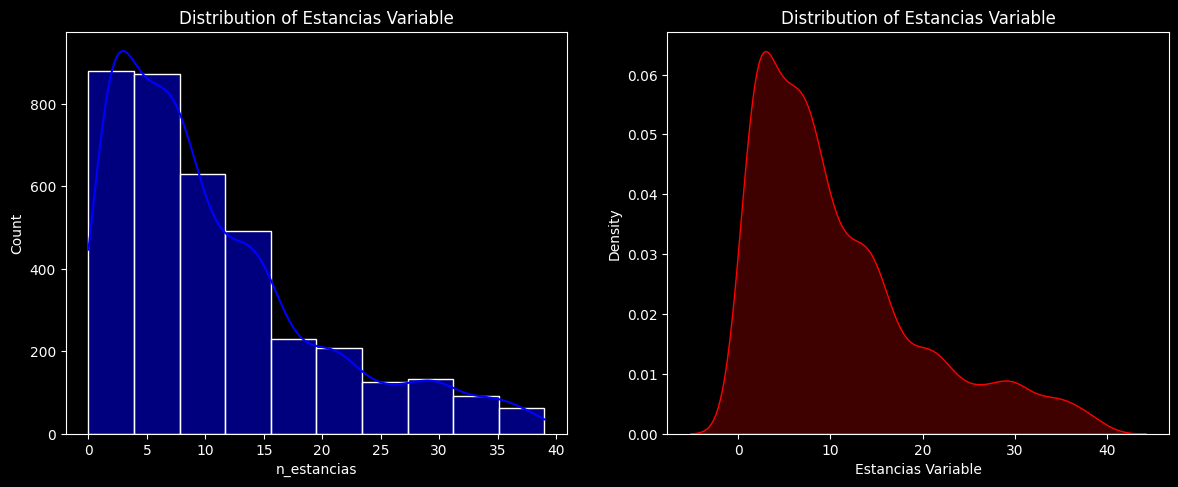

In [26]:
plt.figure(figsize=(22,24))
temp = sin_out['n_estancias']
x = pd.Series(temp,name='Estancias Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Estancias Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of Estancias Variable')
plt.show()

Repetir proceso hasta que no queden outliers

In [27]:
Q1 = num_data['n_visitas'].quantile(0.25)
print("Primer Cuartil", Q1,"\n")

Q3 = num_data['n_visitas'].quantile(0.75)
print("Tercer Cuartil", Q3,"\n")

IQR = Q3 -Q1
print("Rango Intercuartil", IQR,"\n")

Mediana = num_data['n_visitas'].median()
print("Mediana", Mediana,"\n")

Valor_min = num_data['n_visitas'].min()
print("Valor mínimo", Valor_min,"\n")

Valor_max = num_data['n_visitas'].max()
print("Valor máximo", Valor_max,"\n")


Primer Cuartil 2.0 

Tercer Cuartil 7.0 

Rango Intercuartil 5.0 

Mediana 4.0 

Valor mínimo 0 

Valor máximo 99 



In [28]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_Calculado \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_Calculado \n", BS_Calculado)

BI_Calculado 
 -5.5
BS_Calculado 
 14.5


In [29]:
ubicacion_outliers = (num_data['n_visitas'] < BI_Calculado) | (num_data['n_visitas'] > BS_Calculado)
print("\n Ubicación de Outliers \n", ubicacion_outliers)


 Ubicación de Outliers 
 0       False
1       False
2       False
3       False
4       False
        ...  
4008    False
4009    False
4010    False
4011    False
4012    False
Name: n_visitas, Length: 4013, dtype: bool


In [30]:
outliers = num_data[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
       n_estancias  n_visitas  ps_ecog  barthel  gds_fast  eva_ing  \
21            103         21        4       20         0        0   
24             69         31        4       60         0        0   
26             33         15        3       40         0        0   
58             92         40        4       20         0       90   
69             35         18        3       40         0        0   
...           ...        ...      ...      ...       ...      ...   
3936           79         39        4       20         0        0   
3937           60         24        4       40         0        0   
3949           42         16        3       30         0        0   
3993          171         37        2       70         0        0   
3995           29         16        4       50         0        0   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
21                 0        0          0          0            0   
24           

In [31]:
outliers_ordenados = outliers.sort_values("n_visitas")
outliers_ordenados

n_estancias  n_visitas  ps_ecog  barthel  gds_fast  eva_ing  \
2283           52         15        4       20         7        0   
1630           20         15        4       20         0        0   
3557           45         15        3       30         0        0   
1569           18         15        4       10         0        0   
3748           21         15        4       20         0        0   
...           ...        ...      ...      ...       ...      ...   
3115          166         68        2       60         0        0   
2658           11         71        2       90         0        0   
3021           23         76        1       70         0        0   
3691          117         80        1       70         0        0   
3340            7         99        0      100         0        0   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
2283               0        0          0          0            0   
1630               0        0          0          0            0   
3557               1        0          0          0            0   
1569               1        0          0          0            0   
3748               1        0          0          0            0   
...              ...      ...        ...        ...          ...   
3115               0        0          0          0            0   
2658               0        0          0          0            0   
3021               0        0          0          0            0   
3691               0        0          0          0            0   
3340               0        0          0          0            0   

      levomepromazina  year  
2283                0  2021  
1630                0  2020  
3557                0  2022  
1569                0  2020  
3748                0  2022  
...               ...   ...  
3115                0  2022  
2658                0  2021  
3021                0  2022  
3691                0  2022  
3340                0  2022  

[355 rows x 13 columns]

Outliers con log

In [32]:
num_data_log = num_data.copy()
num_data_log

n_estancias  n_visitas  ps_ecog  barthel  gds_fast  eva_ing  \
0              21         10        4       30         0        0   
1              24          8        4        0         0        0   
2              14          6        4       40         0        0   
3               1          1        1       90         0        0   
4               2          1        4       30         0       70   
...           ...        ...      ...      ...       ...      ...   
4008           15          7        4       40         0        0   
4009            6          4        3       30         4        0   
4010           21          7        4       20         0        0   
4011           11          3        4       20         7        0   
4012           11          6        4        0         0        0   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
0                  0        0          0          0            0   
1                  0        0          0          0            0   
2                  0        0          0          0            0   
3                  0        0          0          0            0   
4                  0        0          0          0            0   
...              ...      ...        ...        ...          ...   
4008               1        0          0          0            0   
4009               0        0          0          0            0   
4010               0        0          0          0            0   
4011               1        0          0          0            0   
4012               1        0          0          0            0   

      levomepromazina  year  
0                   0  2017  
1                   0  2017  
2                   0  2017  
3                   0  2017  
4                   0  2017  
...               ...   ...  
4008                0  2022  
4009                0  2022  
4010                0  2022  
4011                0  2022  
4012                0  2022  

[4013 rows x 13 columns]

In [33]:
import numpy as np

# Asumiendo que df es tu DataFrame y 'columna' es la que quieres transformar
num_data_log['n_estancias'] = np.log(num_data_log['n_estancias'])
num_data_log['n_visitas'] = np.log(num_data_log['n_visitas'])
num_data_log['ps_ecog'] = np.log(num_data_log['ps_ecog'])
num_data_log['eva_ing'] = np.log(num_data_log['eva_ing'])
num_data_log['barthel'] = np.log(num_data_log['barthel'])
num_data_log['gds_fast'] = np.log(num_data_log['gds_fast'])
num_data_log


[10/23/23 20:33:02] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \pandas\core\arraylike.py:402: RuntimeWarning: divide by zero                         
                             encountered in log                                                                    
                               result = getattr(ufunc, method)(*inputs, **kwargs)                                  
                                                                                                                   

n_estancias  n_visitas   ps_ecog   barthel  gds_fast   eva_ing  \
0        3.044522   2.302585  1.386294  3.401197      -inf      -inf   
1        3.178054   2.079442  1.386294      -inf      -inf      -inf   
2        2.639057   1.791759  1.386294  3.688879      -inf      -inf   
3        0.000000   0.000000  0.000000  4.499810      -inf      -inf   
4        0.693147   0.000000  1.386294  3.401197      -inf  4.248495   
...           ...        ...       ...       ...       ...       ...   
4008     2.708050   1.945910  1.386294  3.688879      -inf      -inf   
4009     1.791759   1.386294  1.098612  3.401197  1.386294      -inf   
4010     3.044522   1.945910  1.386294  2.995732      -inf      -inf   
4011     2.397895   1.098612  1.386294  2.995732  1.945910      -inf   
4012     2.397895   1.791759  1.386294      -inf      -inf      -inf   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
0                  0        0          0          0            0   
1                  0        0          0          0            0   
2                  0        0          0          0            0   
3                  0        0          0          0            0   
4                  0        0          0          0            0   
...              ...      ...        ...        ...          ...   
4008               1        0          0          0            0   
4009               0        0          0          0            0   
4010               0        0          0          0            0   
4011               1        0          0          0            0   
4012               1        0          0          0            0   

      levomepromazina  year  
0                   0  2017  
1                   0  2017  
2                   0  2017  
3                   0  2017  
4                   0  2017  
...               ...   ...  
4008                0  2022  
4009                0  2022  
4010                0  2022  
4011                0  2022  
4012                0  2022  

[4013 rows x 13 columns]

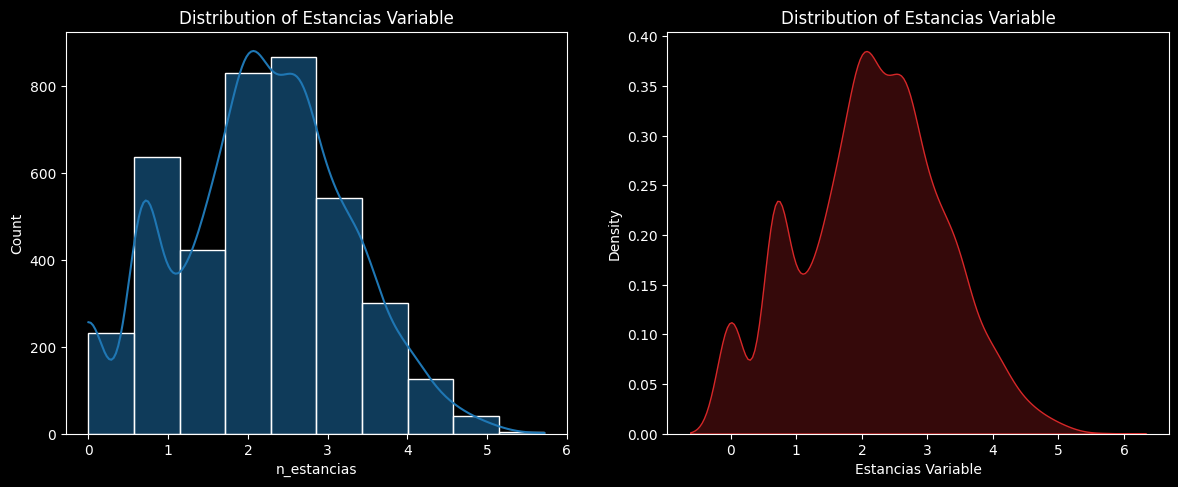

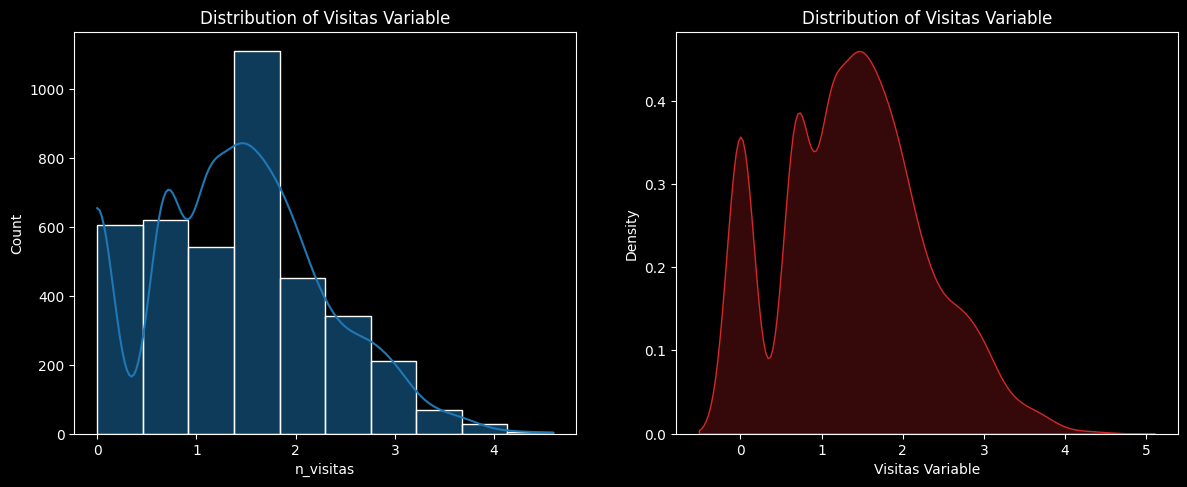

In [34]:
plt.figure(figsize=(22,24))
temp = num_data_log['n_estancias']
x = pd.Series(temp,name='Estancias Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "tab:blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Estancias Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "tab:red")
ax.set_title('Distribution of Estancias Variable')
plt.show()

plt.figure(figsize=(22,24))
temp = num_data_log['n_visitas']
x = pd.Series(temp,name='Visitas Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "tab:blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Visitas Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "tab:red")
ax.set_title('Distribution of Visitas Variable')
plt.show()

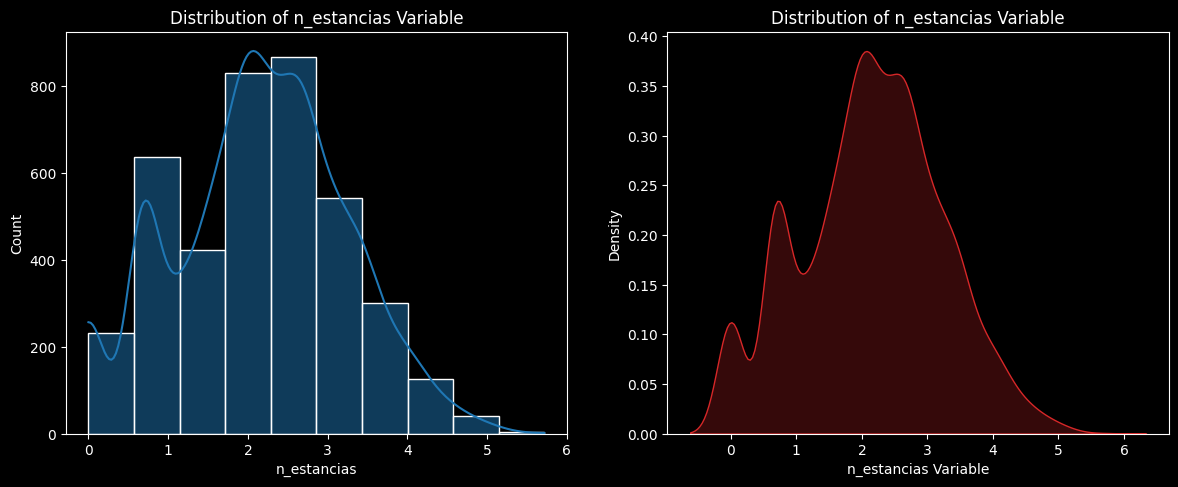

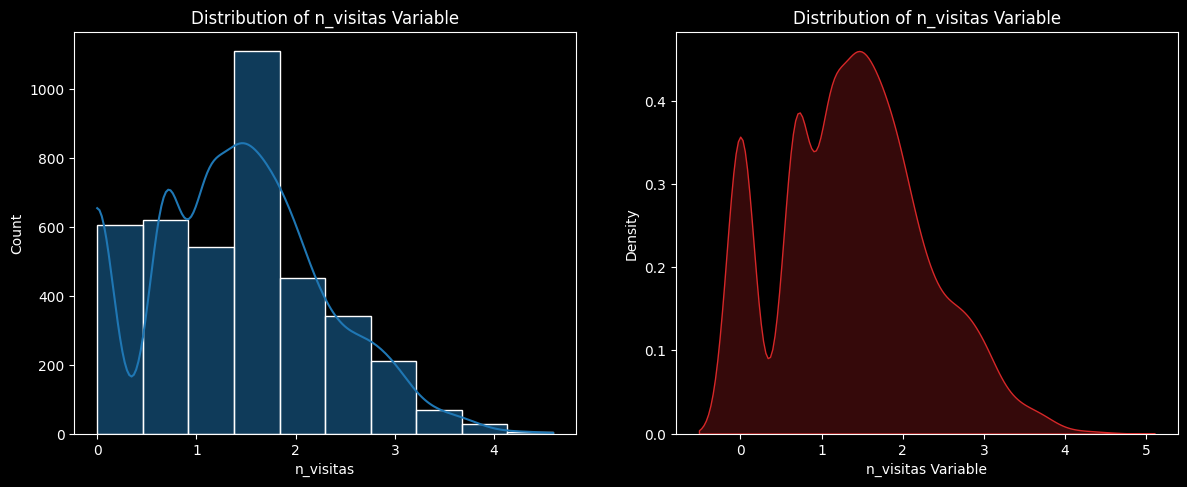

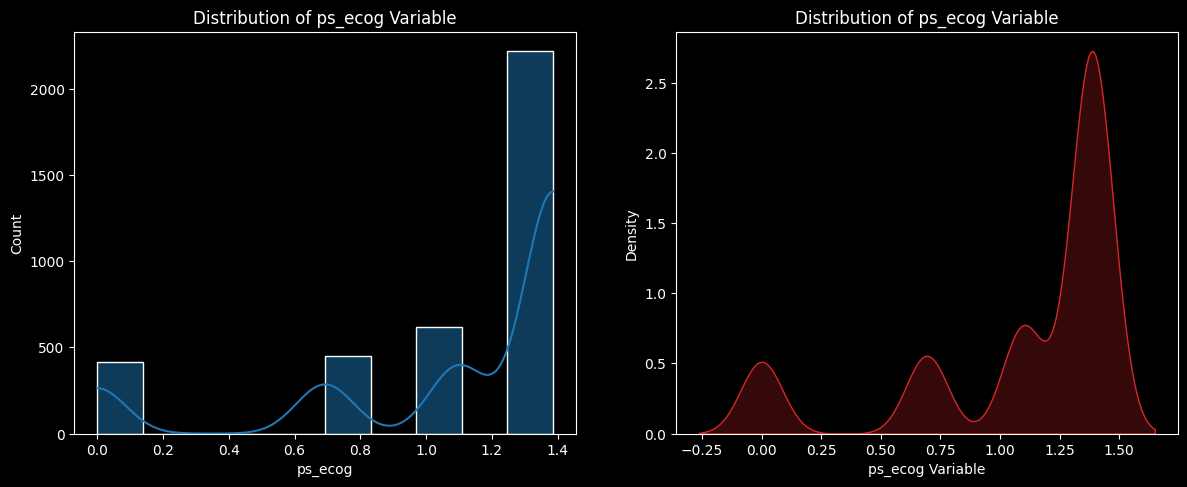

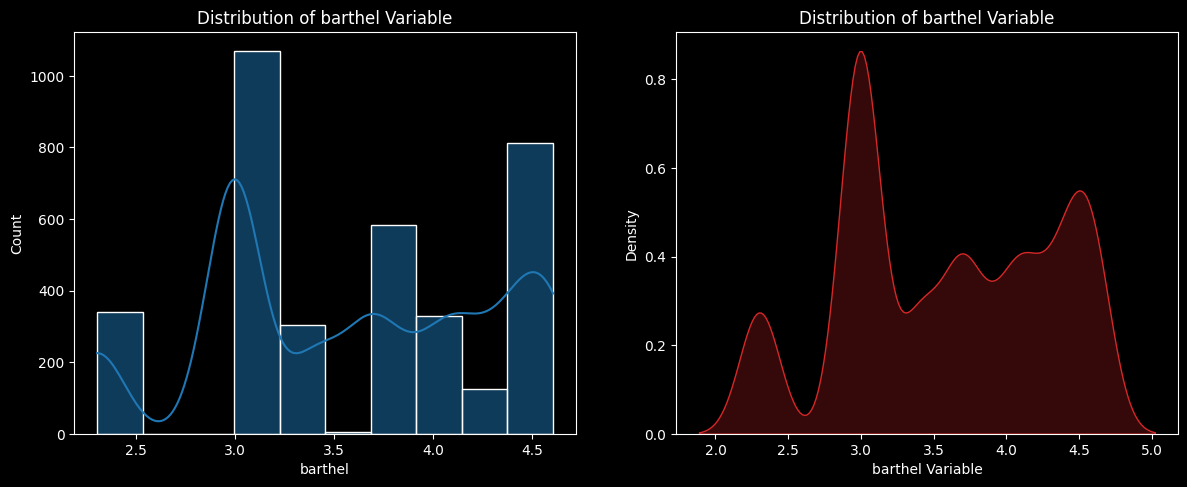

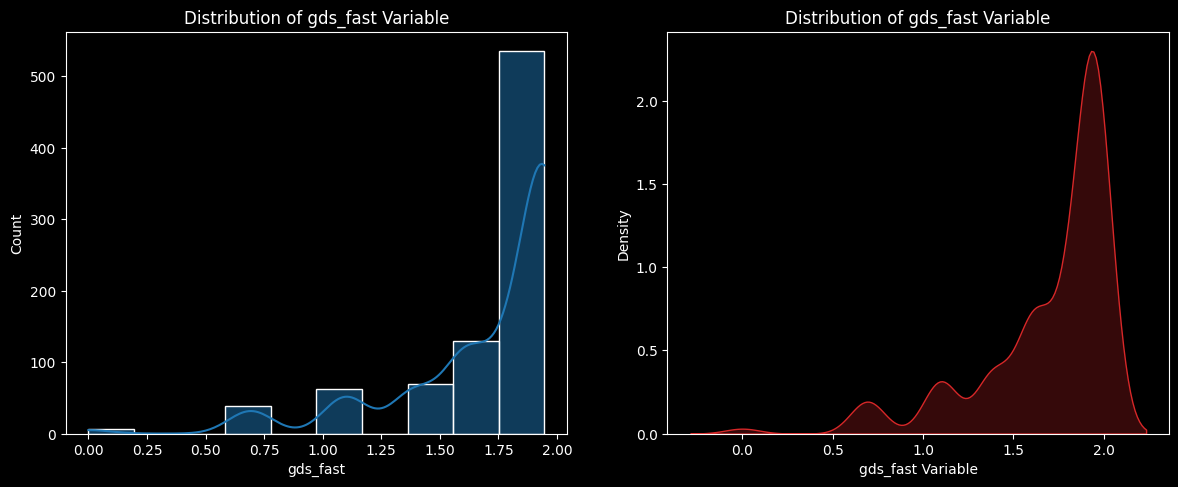

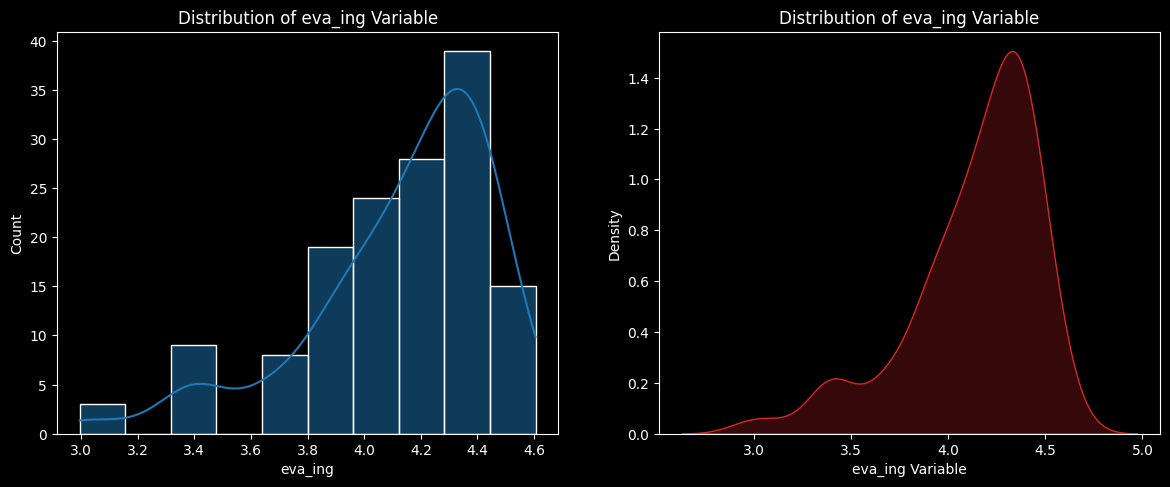

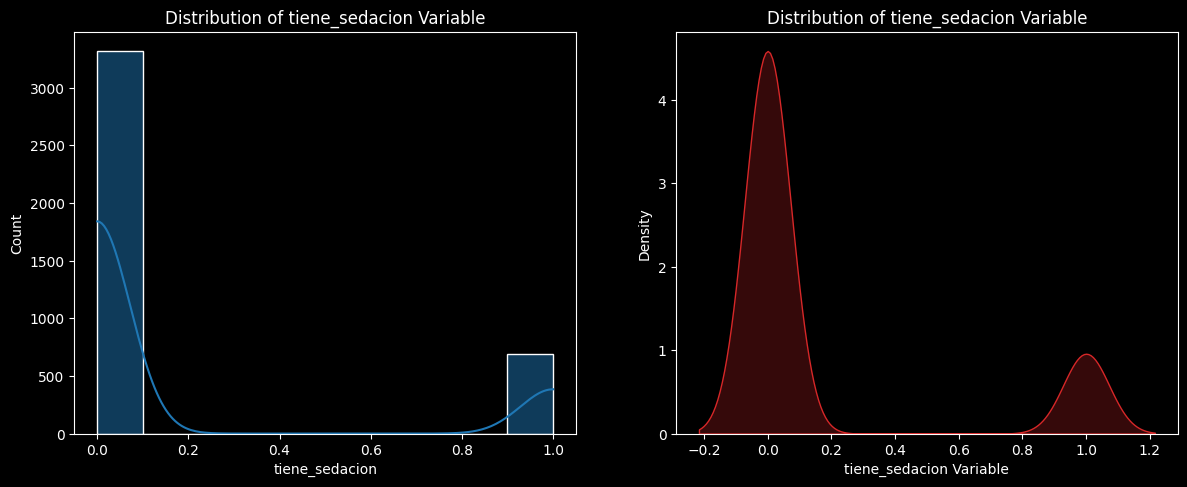

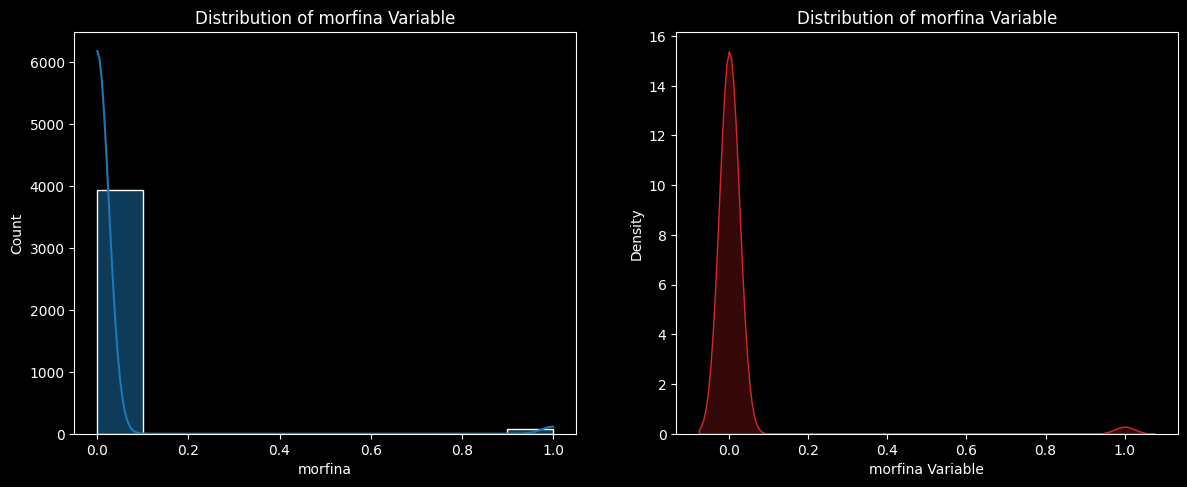

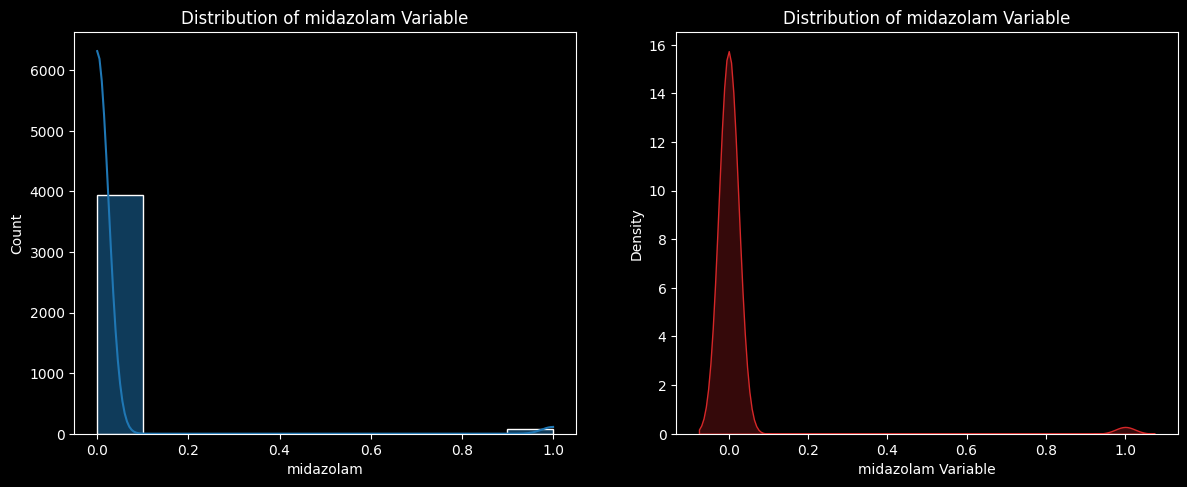

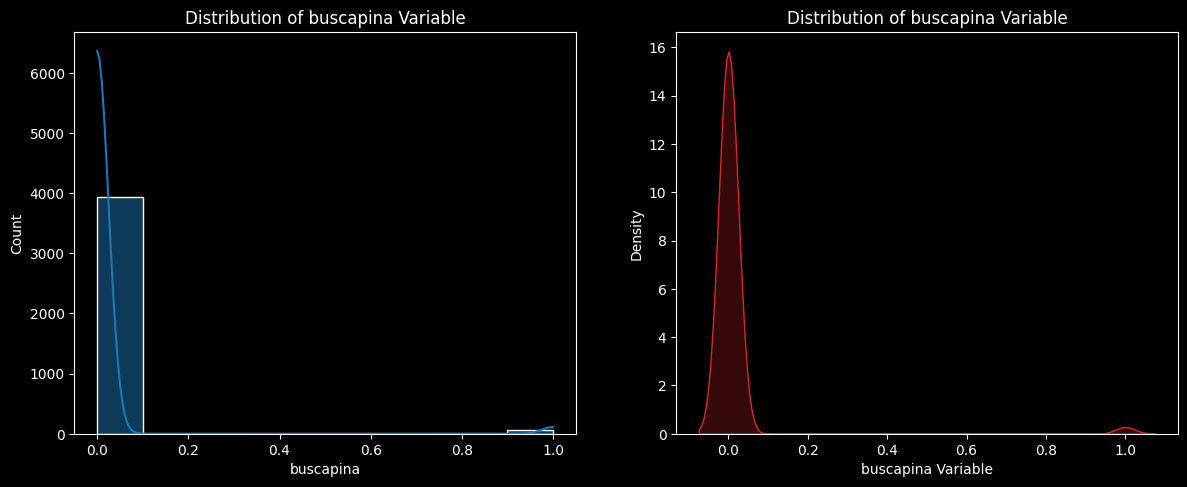

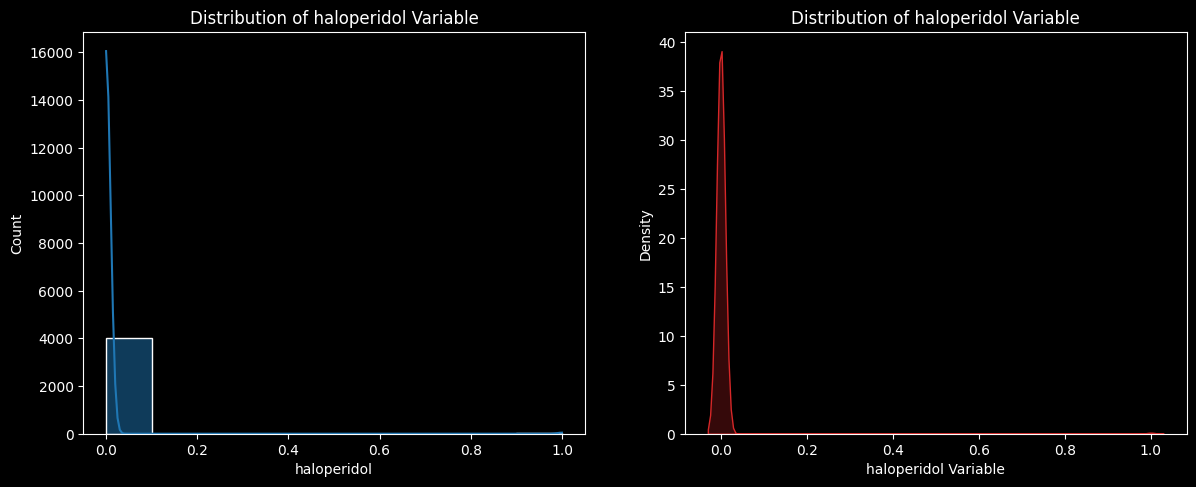

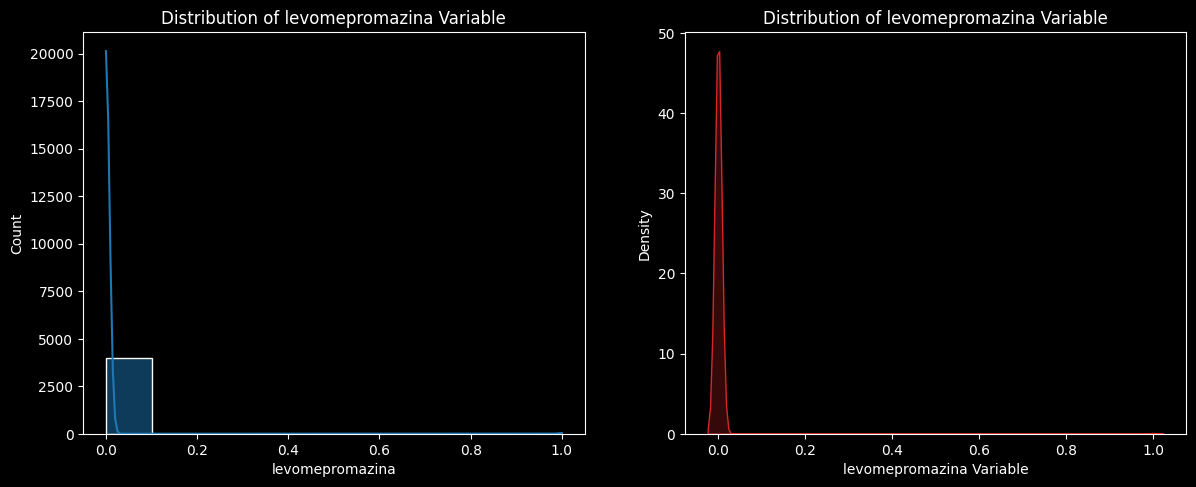

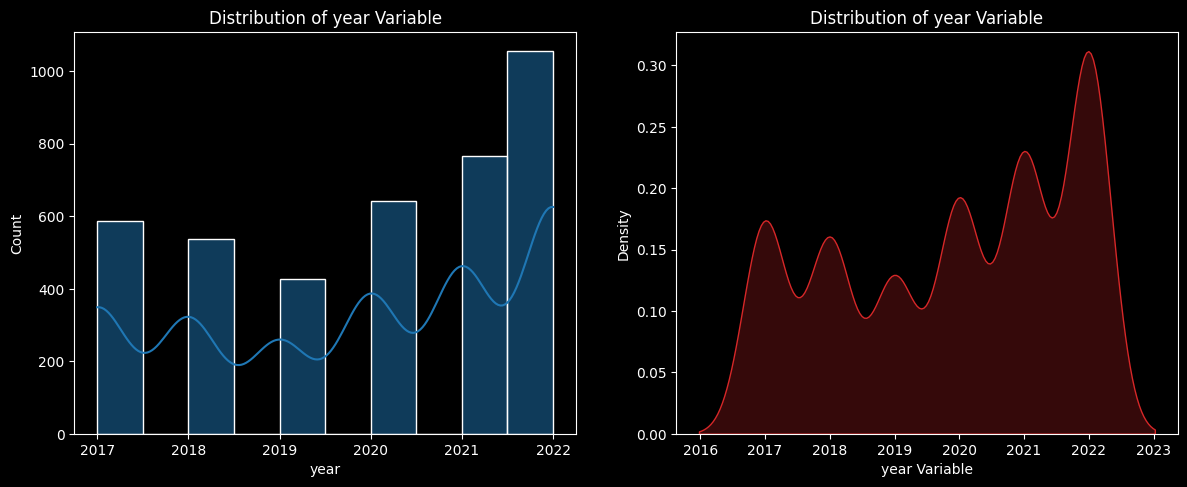

In [35]:
for col in num_data_log:
    temp = num_data_log[col]
    plt.figure(figsize=(22,24))
    x = pd.Series(temp,name=f'{col} Variable')
    plt.subplot(4,3,1)
    ax = sns.histplot(temp,bins=10,color= "tab:blue",kde=True,edgecolor='white', linewidth=1)
    ax.set_title(f"Distribution of {col} Variable")
    plt.subplot(4,3,2)
    ax = sns.kdeplot(x,fill=True,color= "tab:red")
    ax.set_title(f'Distribution of {col} Variable')
    plt.show()

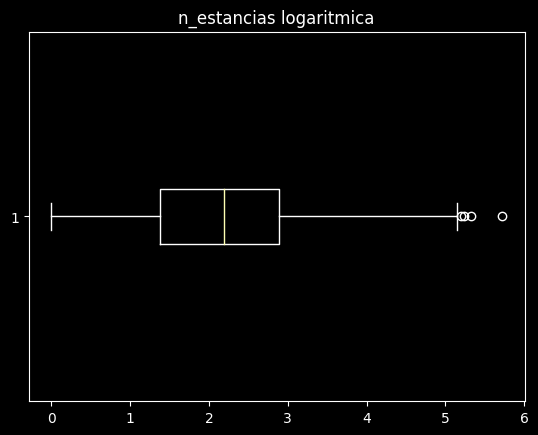

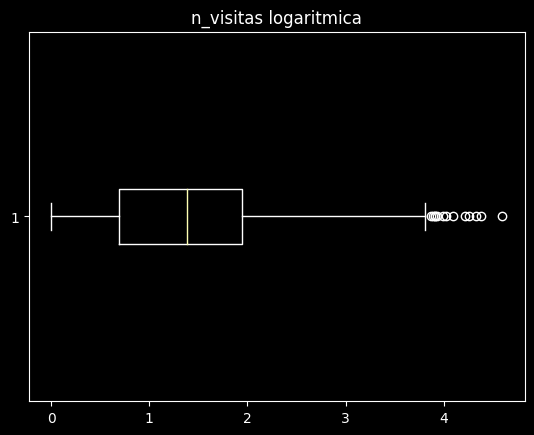

In [36]:
plt.title("n_estancias logaritmica")
plt.boxplot(num_data_log["n_estancias"], vert=False)
plt.show();
plt.title("n_visitas logaritmica")
plt.boxplot(num_data_log["n_visitas"], vert=False)
plt.show();

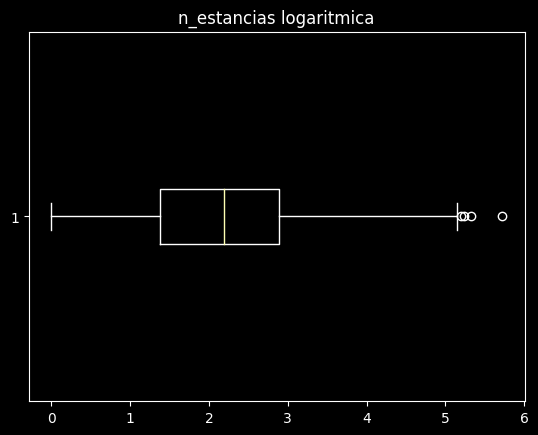

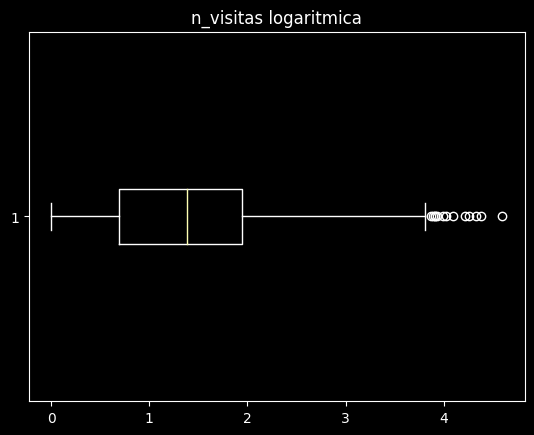

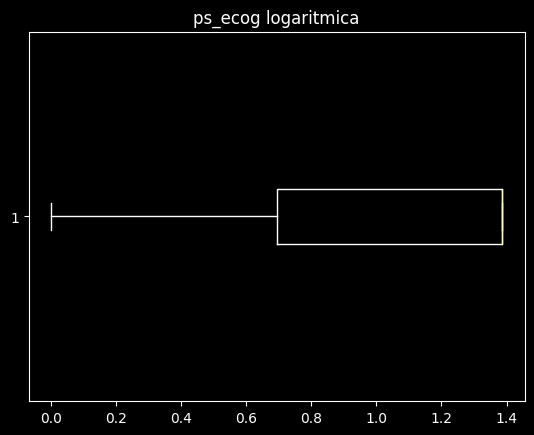

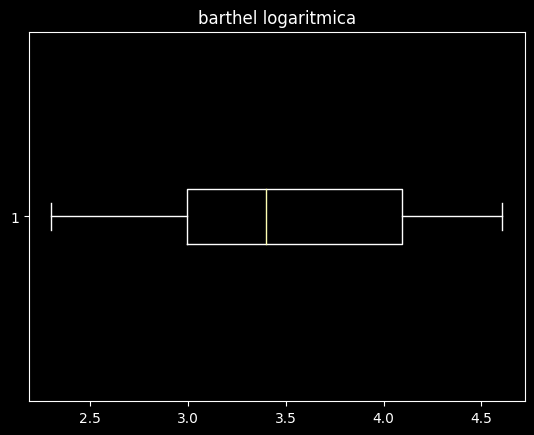

[10/23/23 20:33:07] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \numpy\lib\function_base.py:4655: RuntimeWarning: invalid value                       
                             encountered in subtract                                                               
                               diff_b_a = subtract(b, a)                                                           
                                                                                                                   

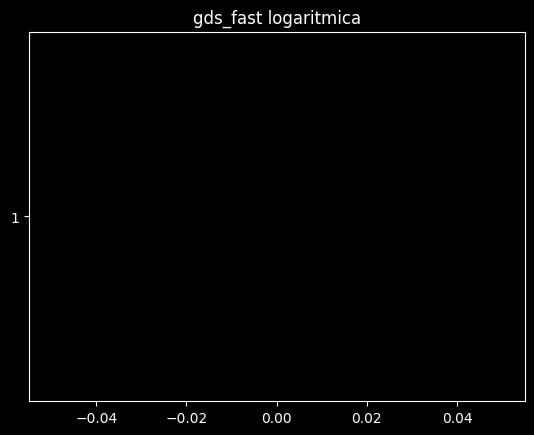

                    WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \numpy\lib\function_base.py:4655: RuntimeWarning: invalid value                       
                             encountered in subtract                                                               
                               diff_b_a = subtract(b, a)                                                           
                                                                                                                   

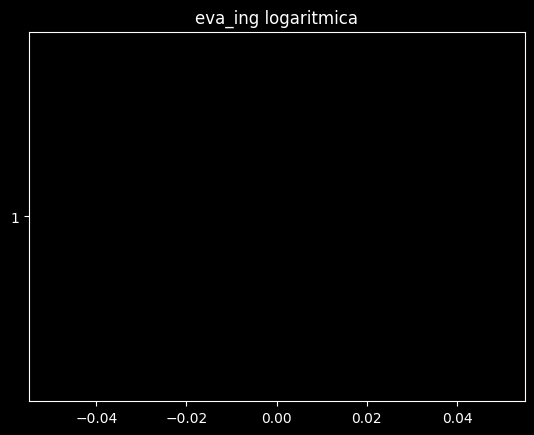

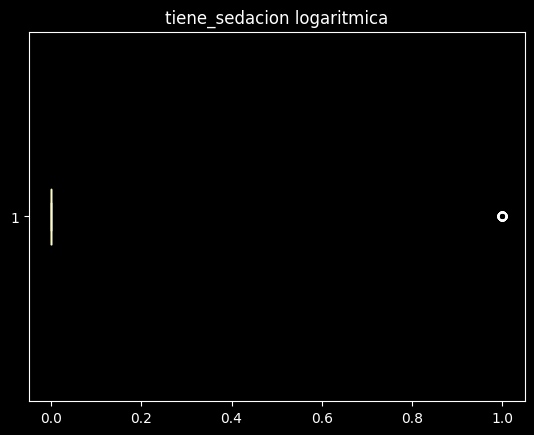

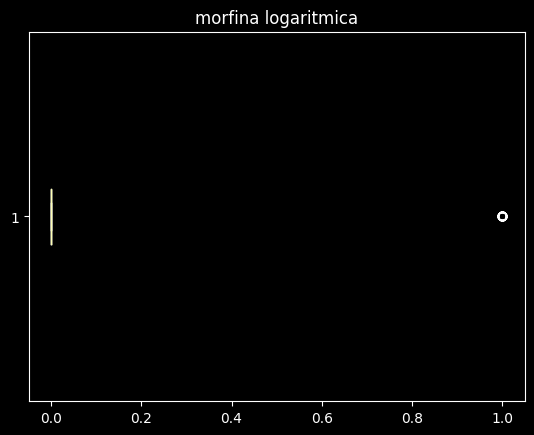

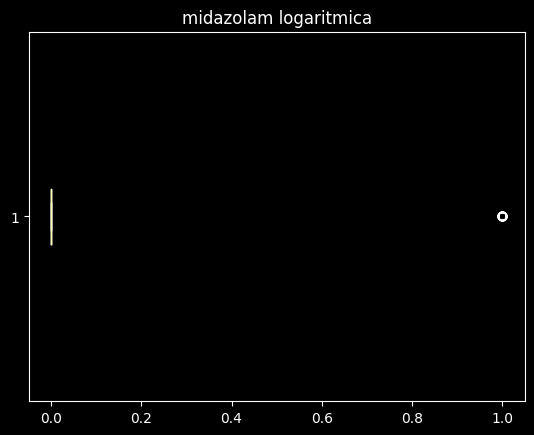

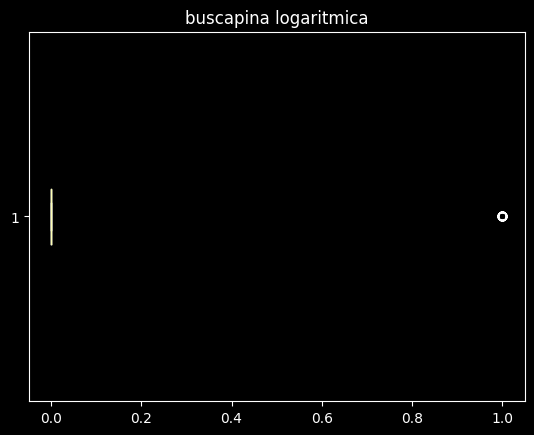

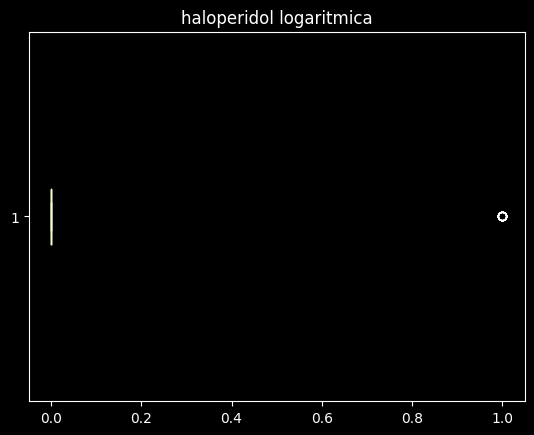

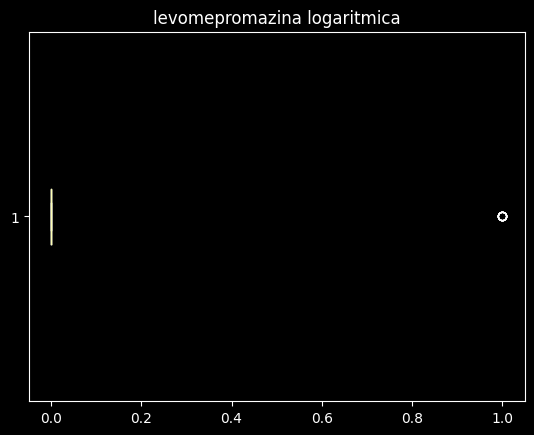

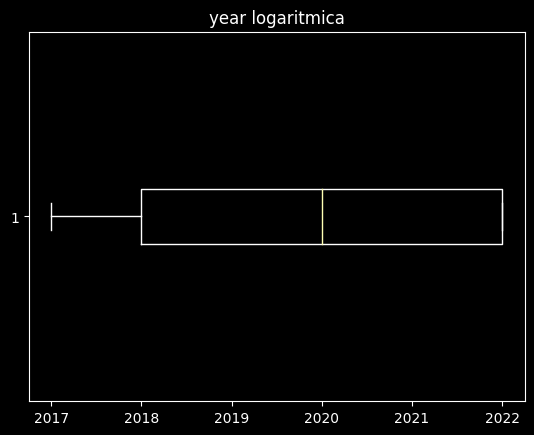

In [37]:
for col in num_data_log:
    plt.title(f"{col} logaritmica")
    plt.boxplot(num_data_log[col], vert=False)
    plt.show();

In [38]:
def unique_sorted_counts(df):
    for col in df:
        print(f"name column: {col}\n", df[col].value_counts(), "\n")
unique_sorted_counts(num_data)

name column: n_estancias
 2      455
7      269
1      231
5      231
8      226
      ... 
180      1
93       1
204      1
91       1
171      1
Name: n_estancias, Length: 128, dtype: int64 

name column: n_visitas
 2     619
1     607
3     542
4     474
5     368
6     269
7     213
8     153
10    104
9      86
12     60
14     51
11     45
15     43
20     40
13     39
16     37
17     35
18     30
0      28
22     20
21     18
19     13
30     12
24     10
25     10
40      9
23      9
27      7
26      6
28      6
31      5
35      4
34      4
33      3
36      3
43      3
42      3
41      2
32      2
39      2
37      2
50      2
56      1
51      1
29      1
60      1
48      1
54      1
71      1
76      1
49      1
68      1
38      1
45      1
99      1
80      1
44      1
Name: n_visitas, dtype: int64 

name column: ps_ecog
 4    2220
3     620
2     452
1     417
0     304
Name: ps_ecog, dtype: int64 

name column: barthel
 20     1068
0       446
40      411
100     34

Now we Analyze Categorical Data

In [39]:
cat_data = df.select_dtypes(exclude=['int']).copy()
cat_data.head()

h_procedencia hospital_category s_procedencia procedencia_category  \
0   gil casares          Santiago          upal    Unidad Paliativos   
1       clinico          Santiago     oncologia            Oncologia   
2       clinico          Santiago           mir                  MIR   
3       clinico          Santiago     digestivo            Digestivo   
4       clinico          Santiago     urgencias            Urgencias   

                    diagnostico        diagnosis_category  \
0                    cancer orl     Canceres y neoplasias   
1               melanoma vulvar              Neurologicas   
2           cancer broncogenico     Canceres y neoplasias   
3             cirrosis hepatica  Hepaticas y pancreaticas   
4  neoplasia de mama estadio IV     Canceres y neoplasias   

                  motivo_ing ingreso_category   motivo_alta   alta_category  \
0           control sintomas         Sintomas     reingreso  Complicaciones   
1          mal control dolor         Sintomas        exitus          Exitus   
2          control evolutivo     Evaluaciones  fin cuidados           Otros   
3  administracion octreotido            Otros  fin cuidados           Otros   
4           control sintomas         Sintomas        exitus          Exitus   

   ...     otros_complicaciones otros otros_1 otros_2   otros_category  \
0  ...   reingreso en urgencias    no      no      no  No especificado   
1  ...  met pulmonares y digest    no      no      no  No especificado   
2  ...                       no    no      no      no  No especificado   
3  ...                       no    no      no      no  No especificado   
4  ...                       no    no      no      no  No especificado   

    categorized_combined_otros        medico ayuntamiento     latitude  \
0                        Otros        valdes  desconocido  desconocido   
1                        Otros   galego feal  desconocido  desconocido   
2  Desconocido/No especificado  lopez renedo  desconocido  desconocido   
3  Desconocido/No especificado  lopez renedo  desconocido  desconocido   
4  Desconocido/No especificado  lopez renedo  desconocido  desconocido   

     longitude  
0  desconocido  
1  desconocido  
2  desconocido  
3  desconocido  
4  desconocido  

[5 rows x 42 columns]

In [40]:
# Frequency Distribution of the categorical column
cat_data.nunique()


h_procedencia                   17
hospital_category                3
s_procedencia                  100
procedencia_category            10
diagnostico                   1513
diagnosis_category              10
motivo_ing                     560
ingreso_category                 4
motivo_alta                     90
alta_category                    4
fecha_alta                     213
ap                               2
paliativo_onc_noc                3
paliativo_no_onc_noc             3
fiebre                           3
disnea                           3
dolor                            2
delirium                         3
sedacion                        26
p_terminal                       3
agonia                           3
ast_anorx                        2
cronico_reag                     3
trato_antibiotico                3
transfusion                      3
paracentesis                     3
agudo_estable                    3
toracocentesis                   3
fe_iv              

# 1.Frecuency Analysis

In [41]:
[(col, df[col].value_counts()) for col in df]


[
    (
        'h_procedencia',
        clinico                 2240
no                      1250
conxo                    329
gil casares              157
provincial                12
chuac                      6
residencia                 5
si                         3
rosaleda                   3
san rafael la coruna       1
lucus augusti              1
quiron la coruna           1
desconocido                1
ap                         1
salnes                     1
hula                       1
pontevedra                 1
Name: h_procedencia, dtype: int64
    ),
    (
        'hospital_category',
        Santiago    2747
no          1251
Otros         15
Name: hospital_category, dtype: int64
    ),
    (
        's_procedencia',
        no                              1225
oncologia                        538
mir                              483
urgencias                        415
upal                             208
                                ... 
consultas externas oncol

In [42]:
for col in cat_data:
    print(round(cat_data[col].value_counts()/len(cat_data[col]),3))

clinico                 0.558
no                      0.311
conxo                   0.082
gil casares             0.039
provincial              0.003
chuac                   0.001
residencia              0.001
si                      0.001
rosaleda                0.001
san rafael la coruna    0.000
lucus augusti           0.000
quiron la coruna        0.000
desconocido             0.000
ap                      0.000
salnes                  0.000
hula                    0.000
pontevedra              0.000
Name: h_procedencia, dtype: float64
Santiago    0.685
no          0.312
Otros       0.004
Name: hospital_category, dtype: float64
no                              0.305
oncologia                       0.134
mir                             0.120
urgencias                       0.103
upal                            0.052
                                ...  
consultas externas oncologia    0.000
mir gil                         0.000
enfermedad infecciosas          0.000
respiratorio      

## 1.1Visualización de las frecuencias

In [43]:
cat_data.columns


Index(['h_procedencia', 'hospital_category', 's_procedencia',
       'procedencia_category', 'diagnostico', 'diagnosis_category',
       'motivo_ing', 'ingreso_category', 'motivo_alta', 'alta_category',
       'fecha_alta', 'ap', 'paliativo_onc_noc', 'paliativo_no_onc_noc',
       'fiebre', 'disnea', 'dolor', 'delirium', 'sedacion', 'p_terminal',
       'agonia', 'ast_anorx', 'cronico_reag', 'trato_antibiotico',
       'transfusion', 'paracentesis', 'agudo_estable', 'toracocentesis',
       'fe_iv', 'ps_ecog_classification', 'barthel_classification',
       'gds_fast_classification', 'otros_complicaciones', 'otros', 'otros_1',
       'otros_2', 'otros_category', 'categorized_combined_otros', 'medico',
       'ayuntamiento', 'latitude', 'longitude'],
      dtype='object')

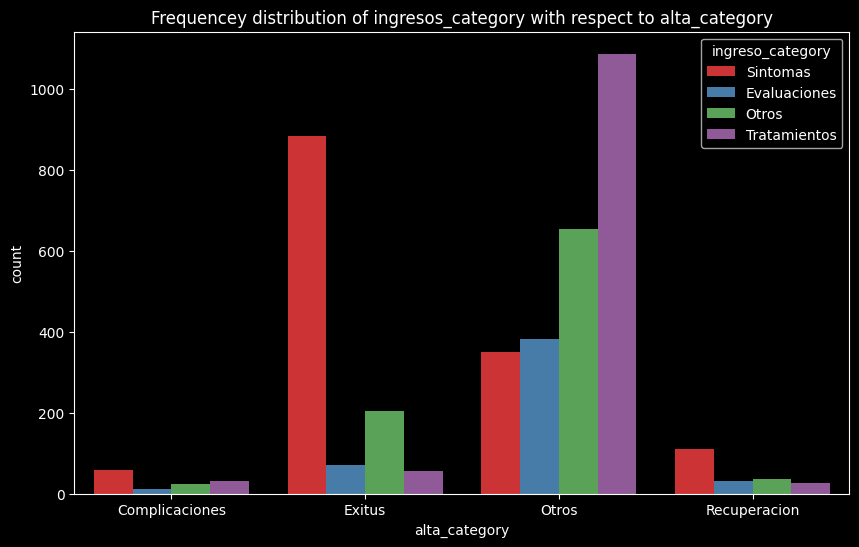

In [44]:
f , ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='alta_category',hue='ingreso_category',data=cat_data,palette='Set1')
ax.set_title('Frequencey distribution of ingresos_category with respect to alta_category')
plt.show()

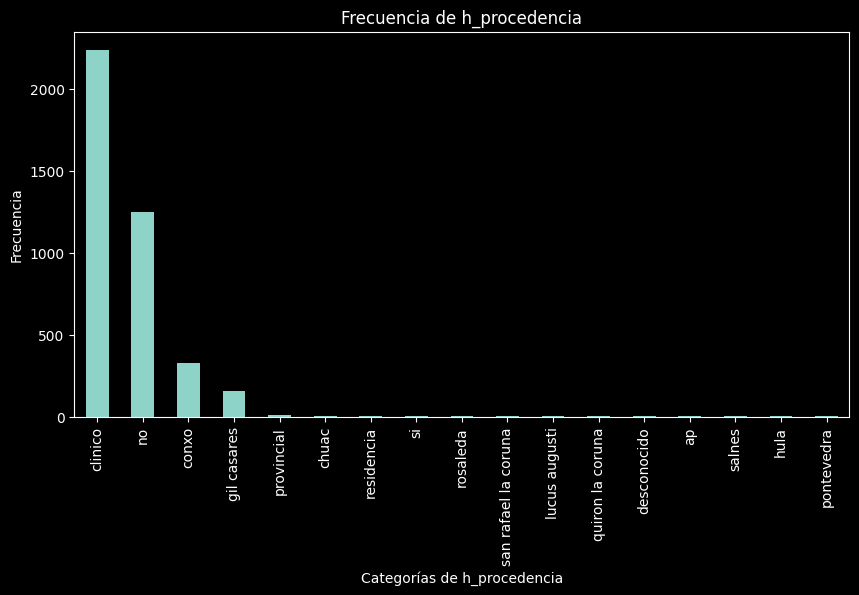

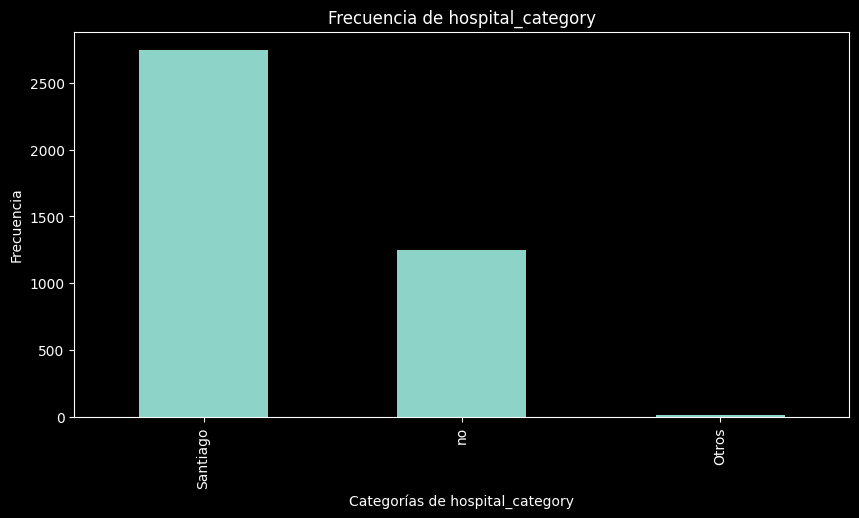

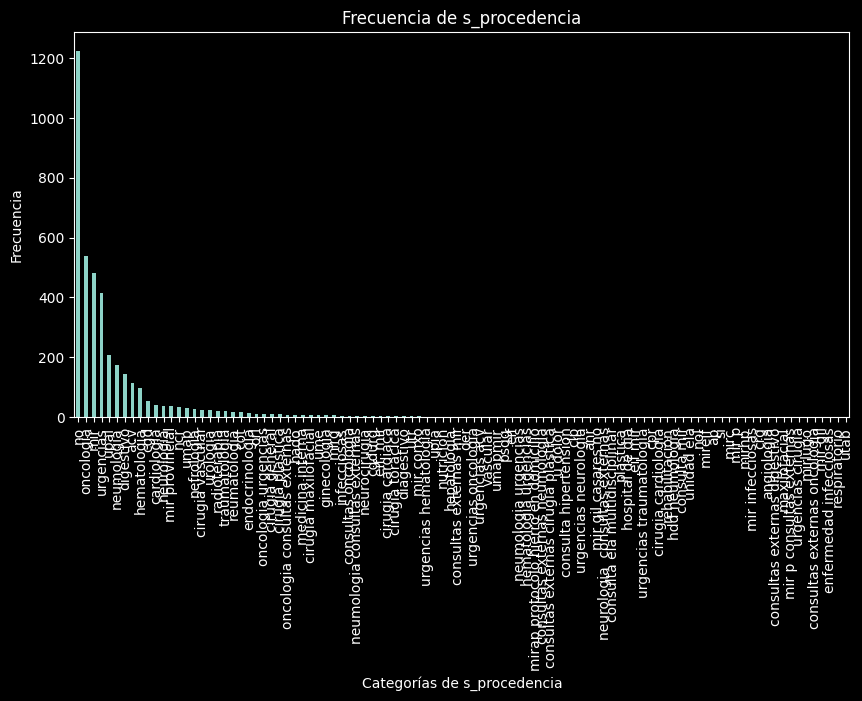

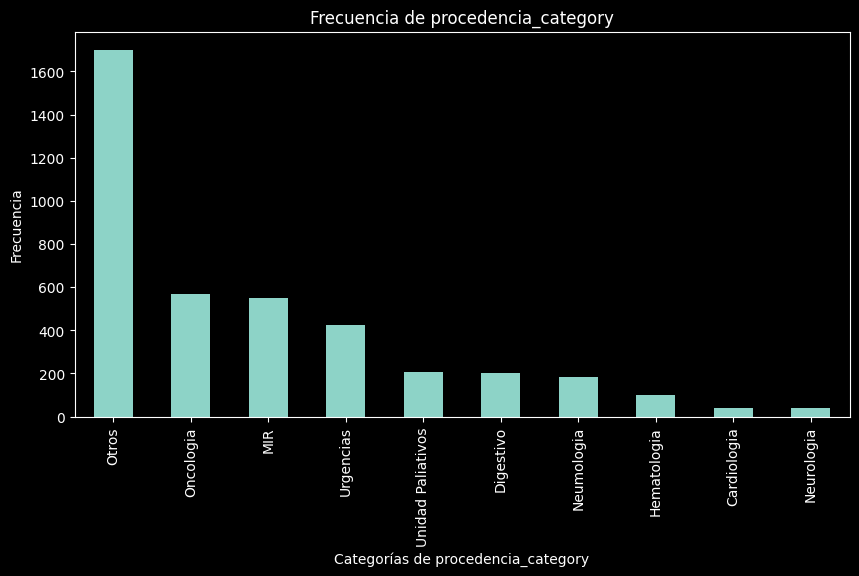

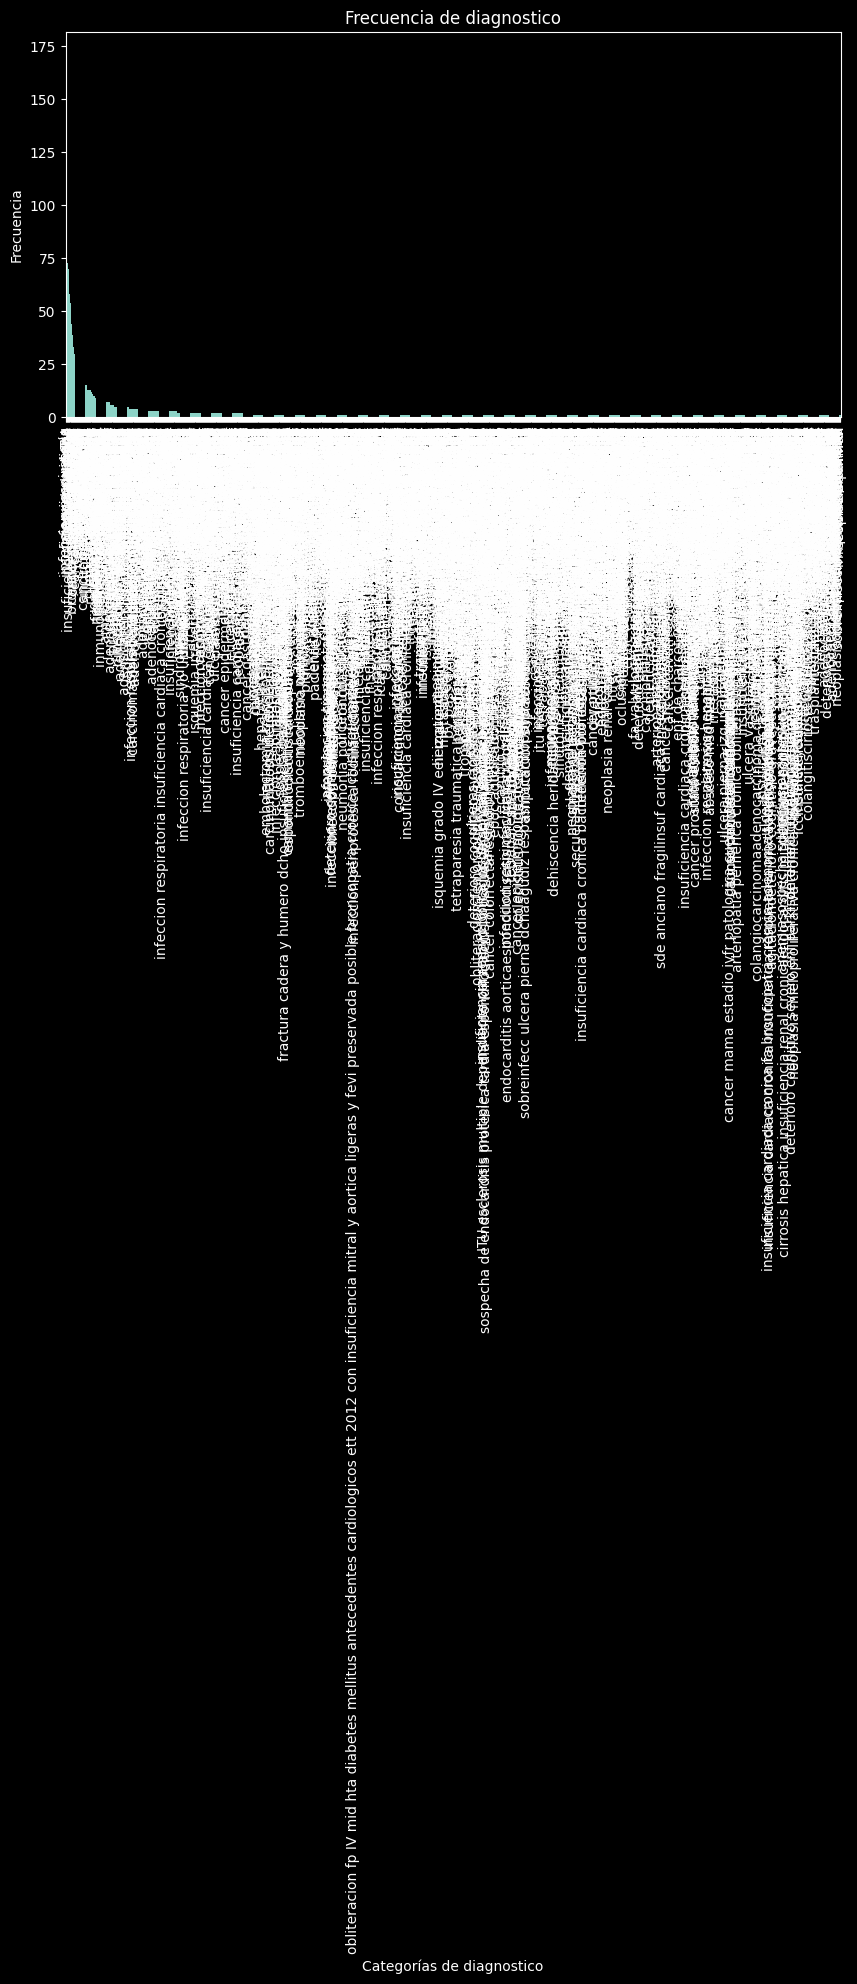

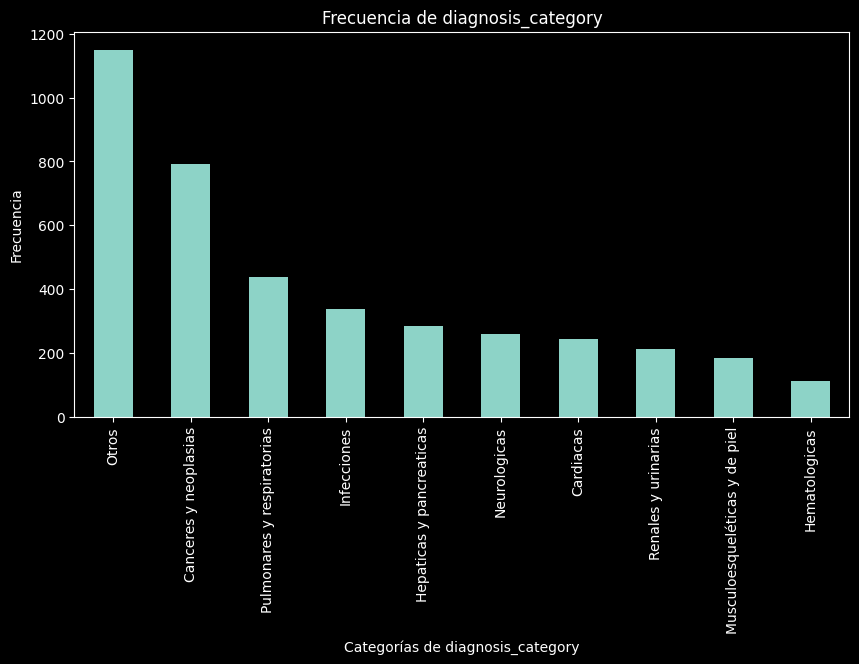

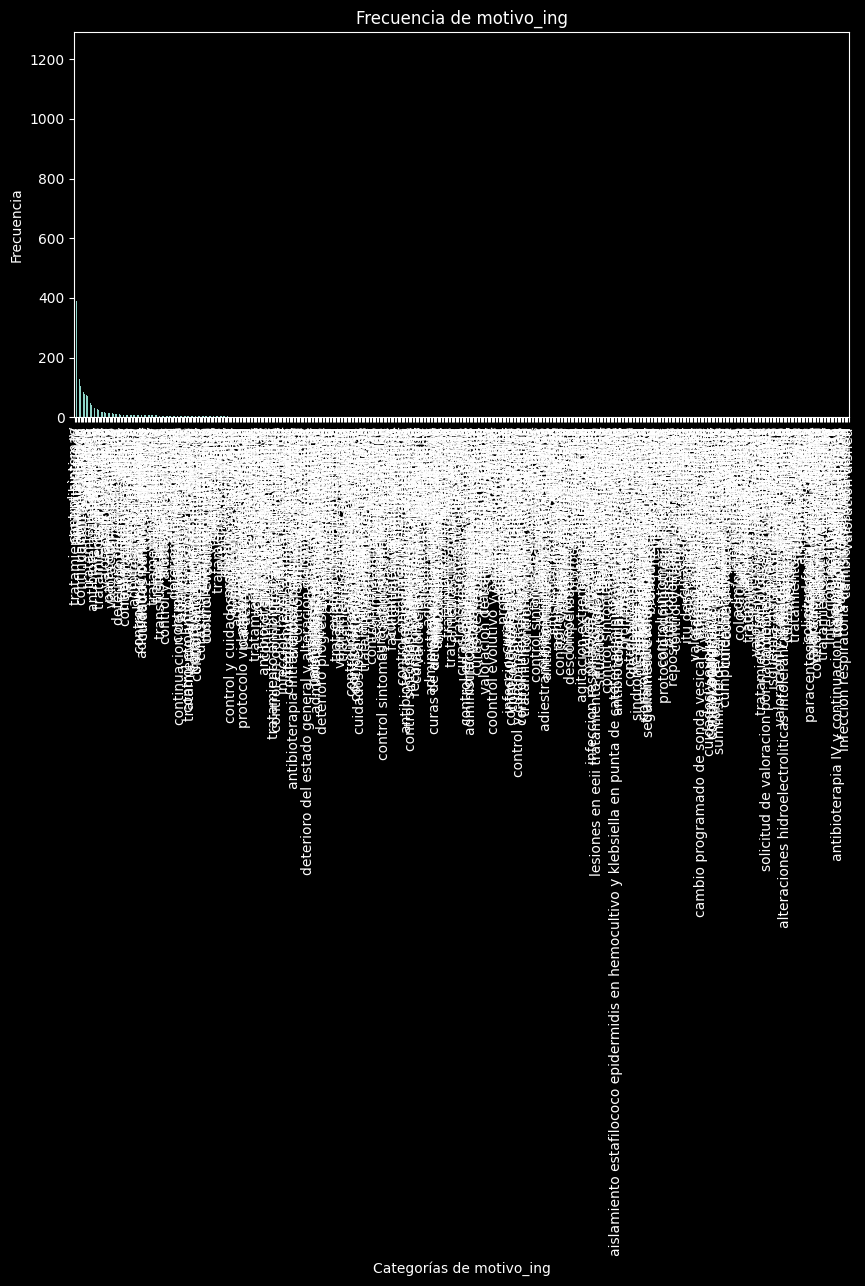

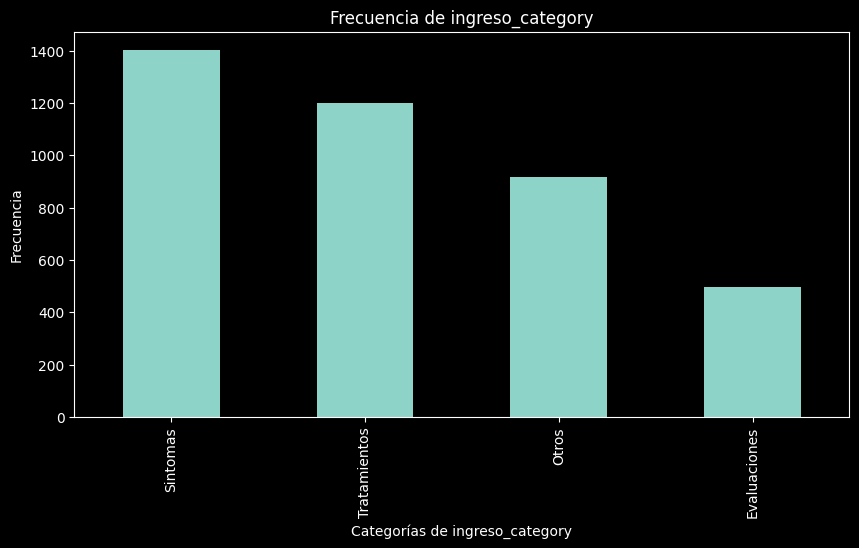

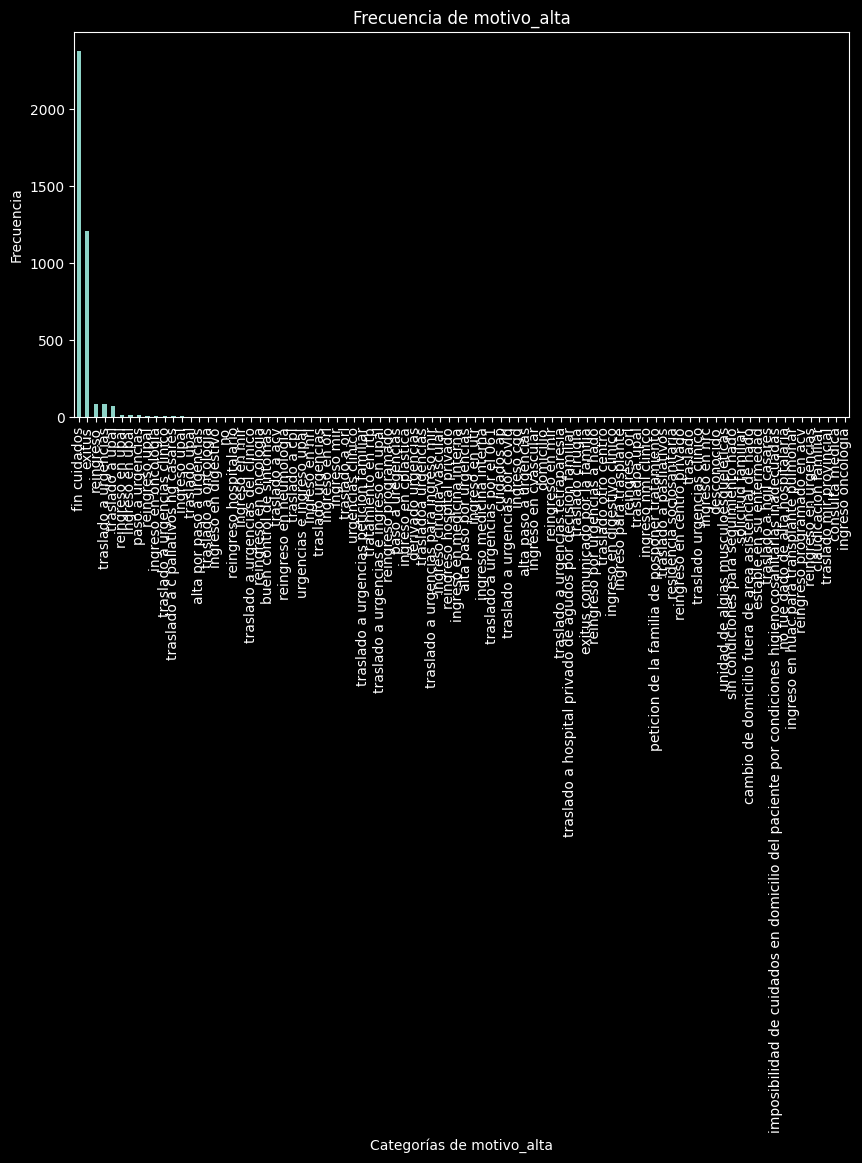

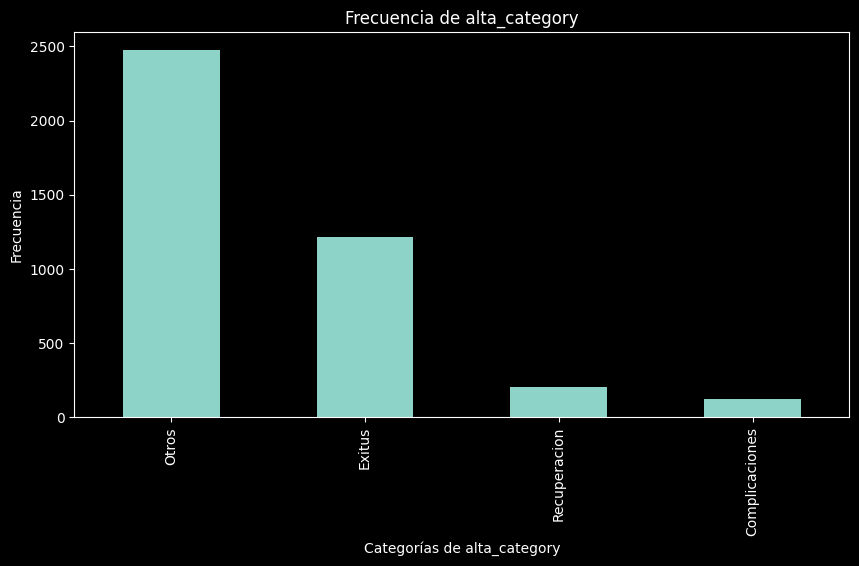

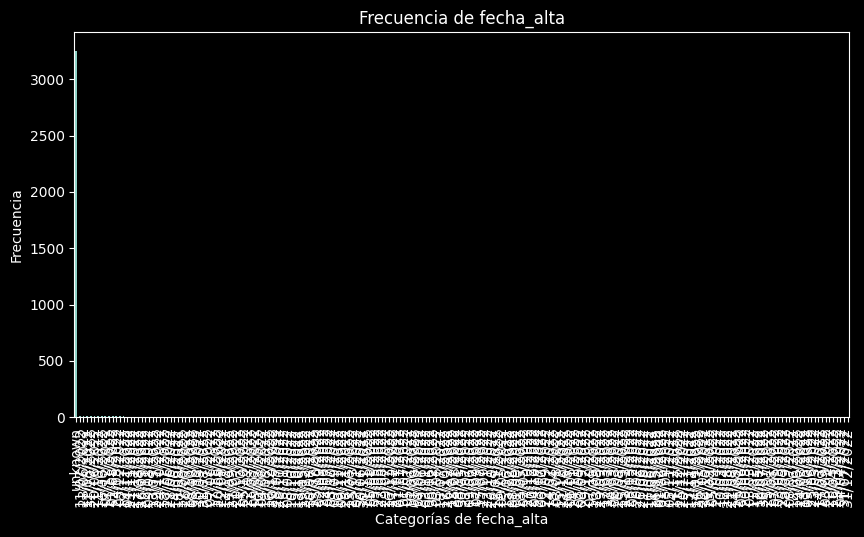

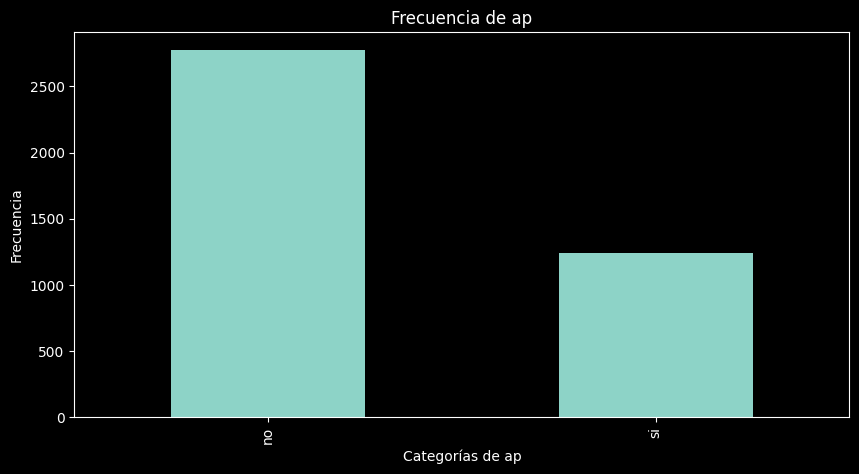

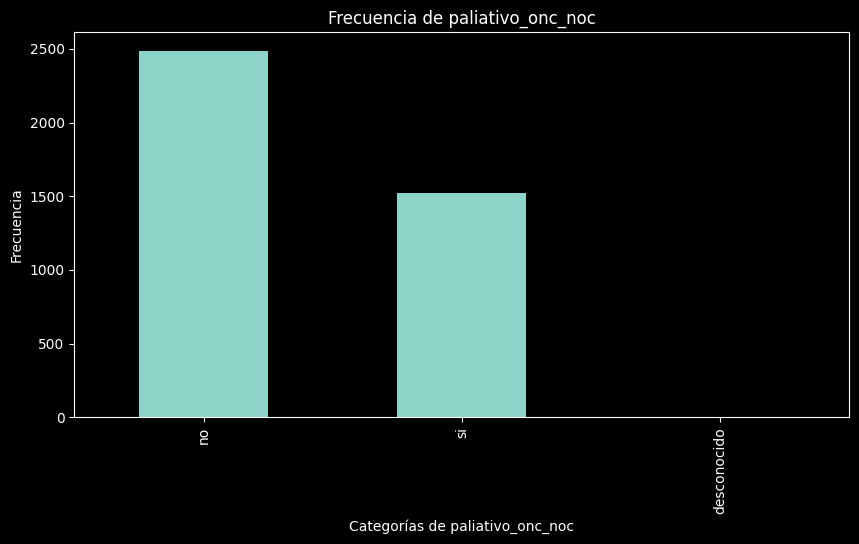

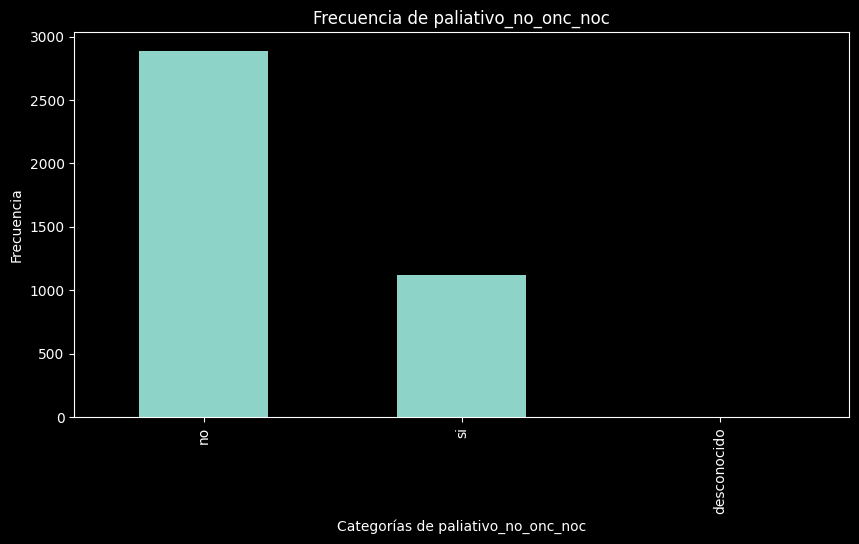

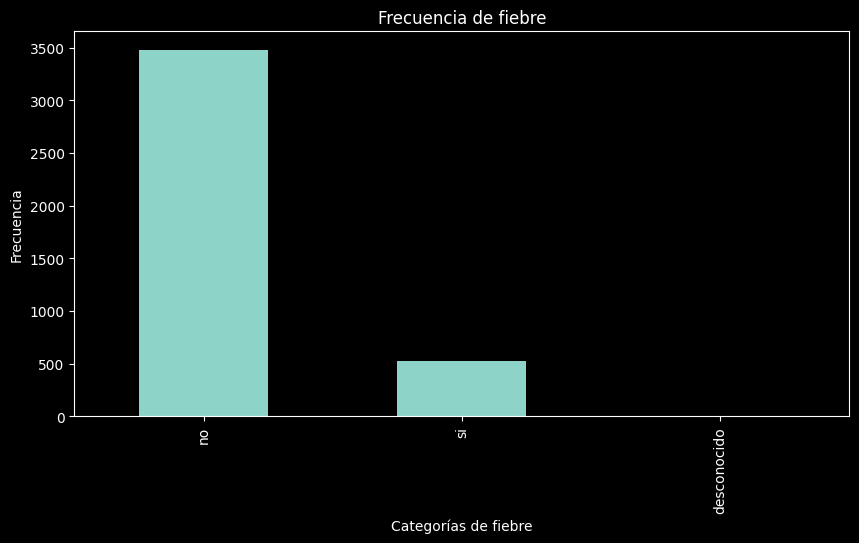

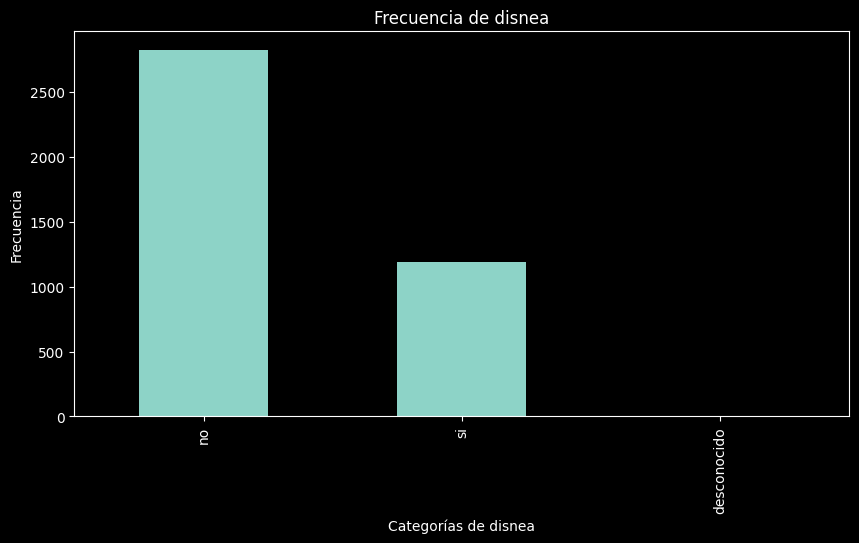

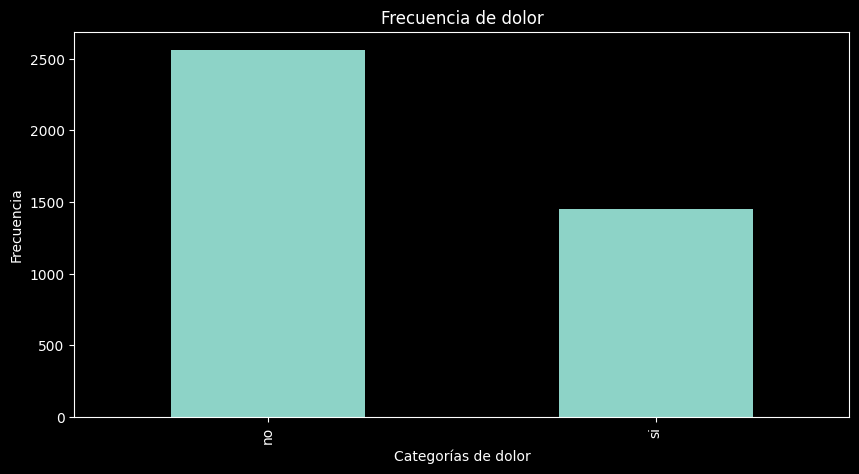

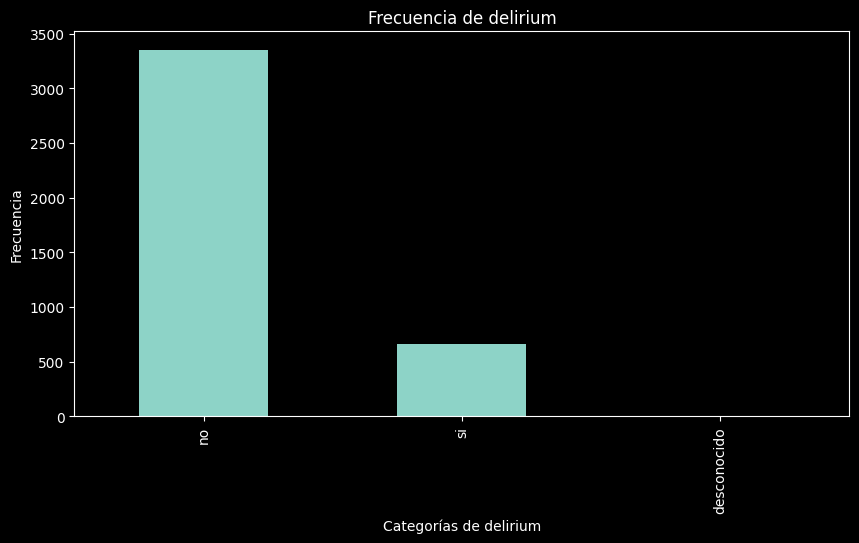

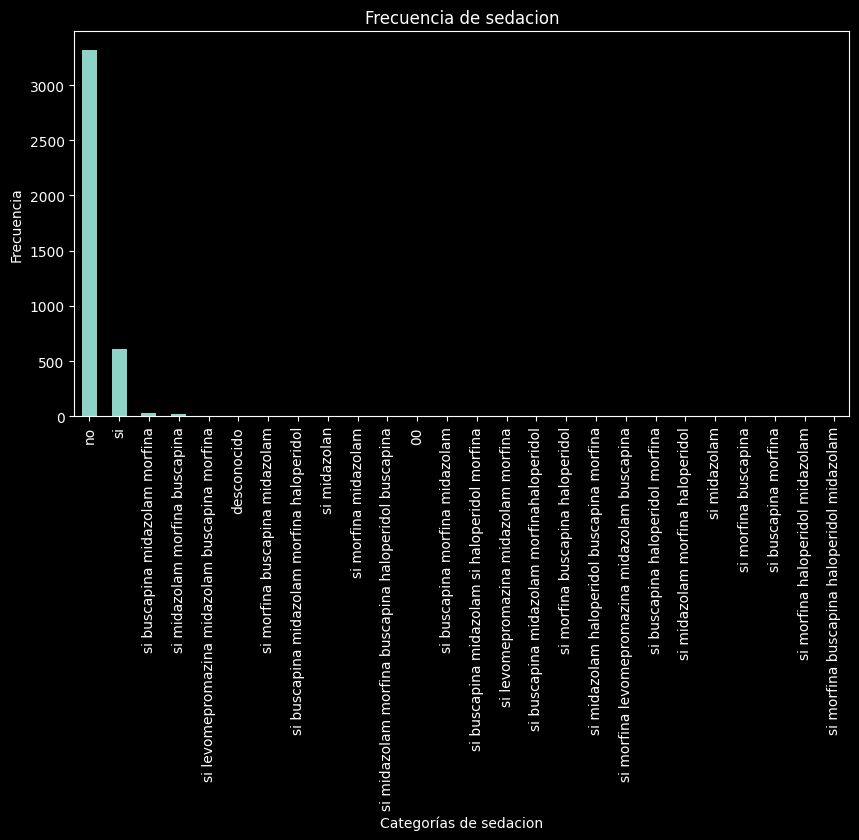

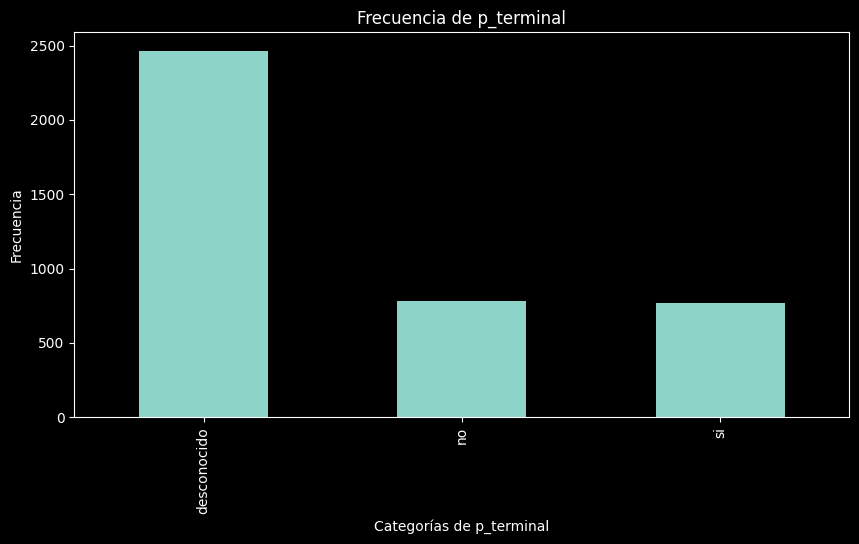

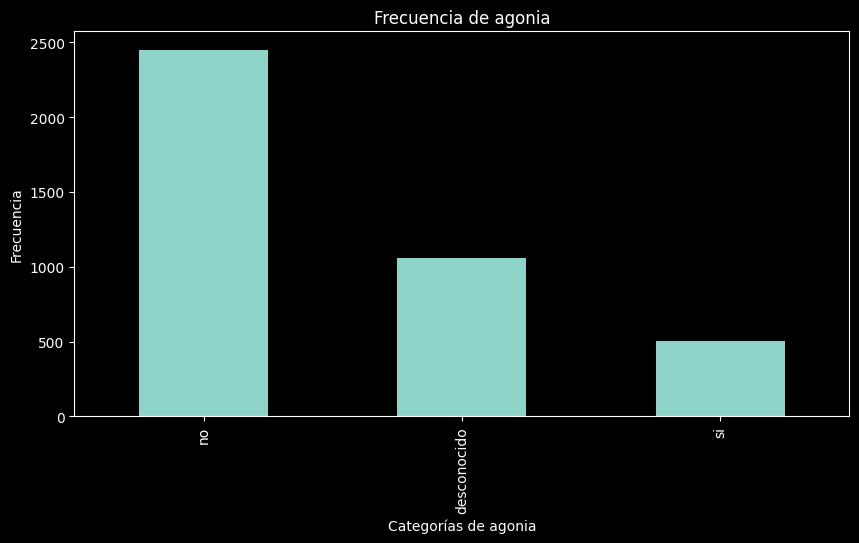

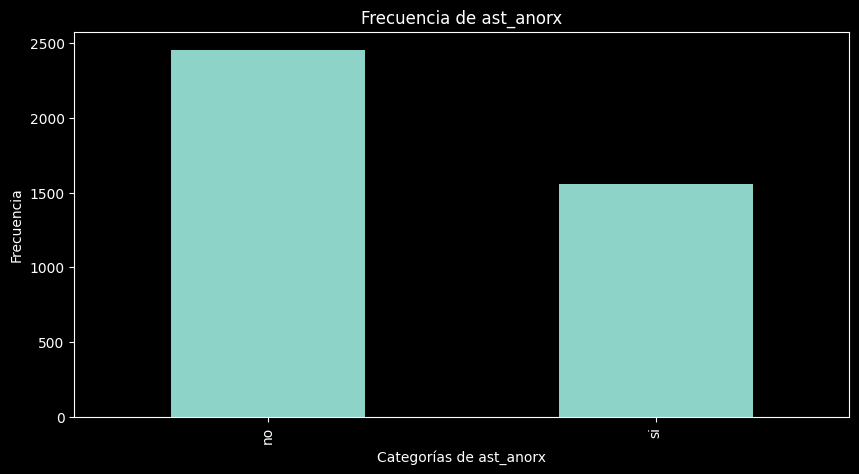

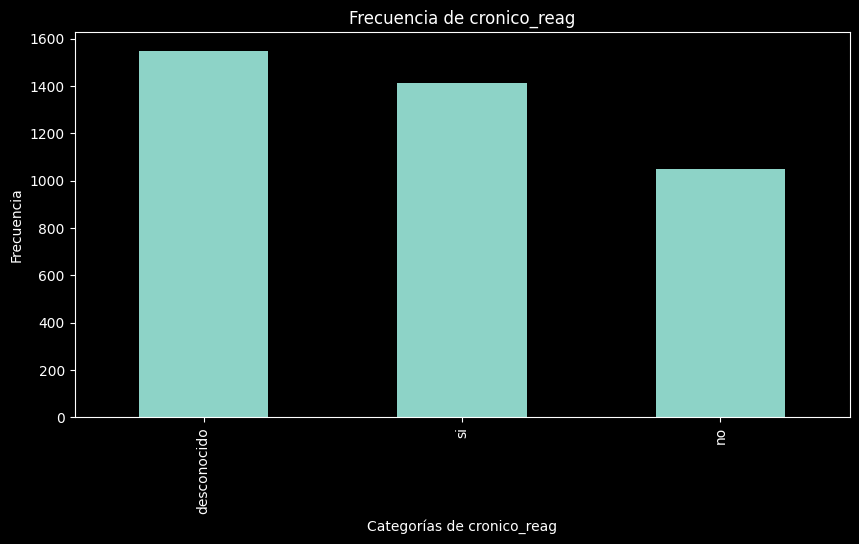

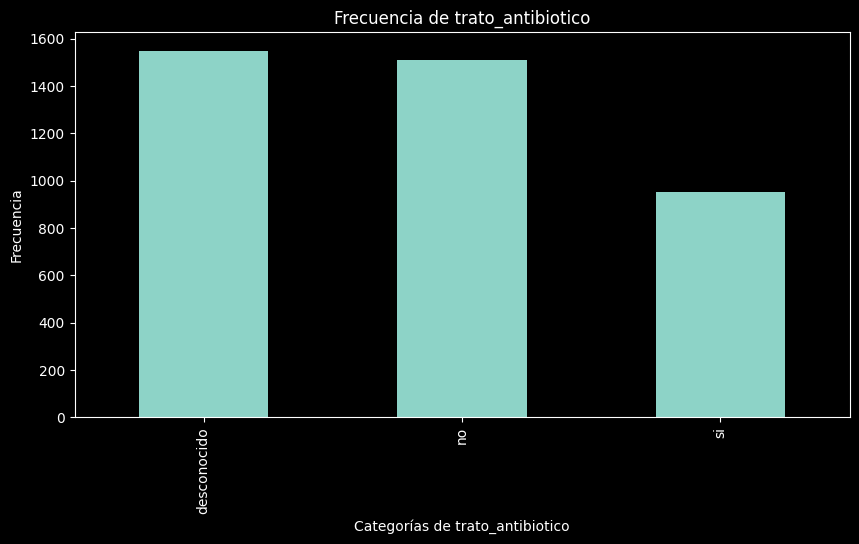

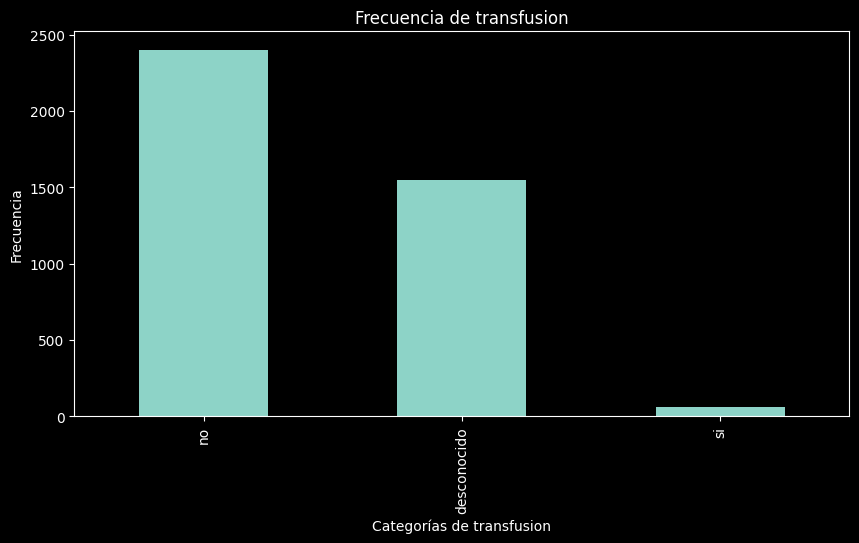

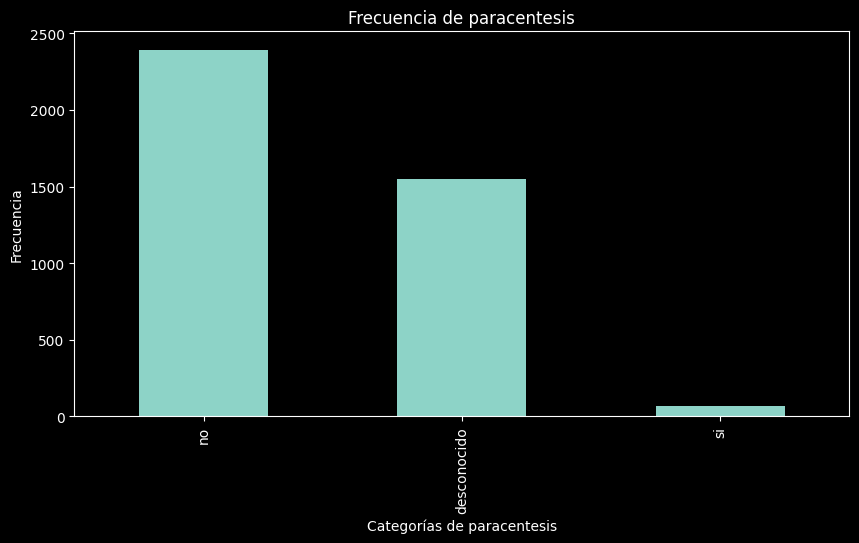

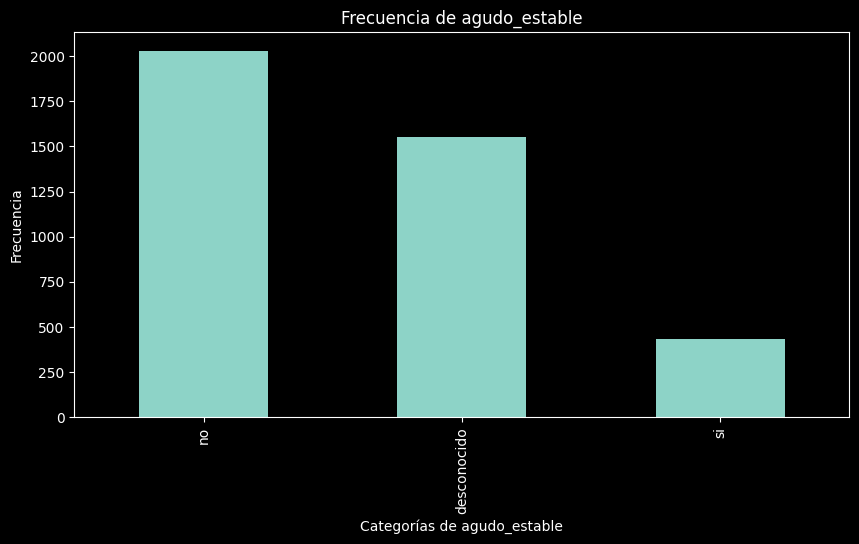

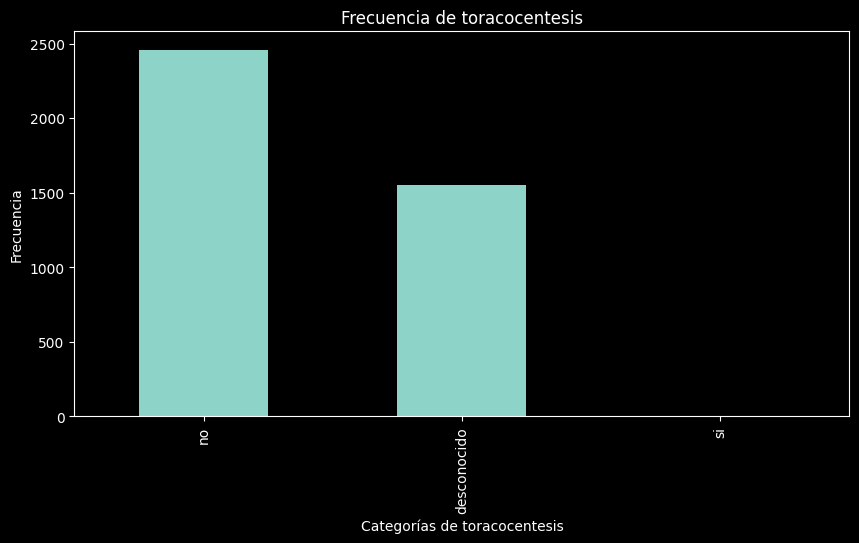

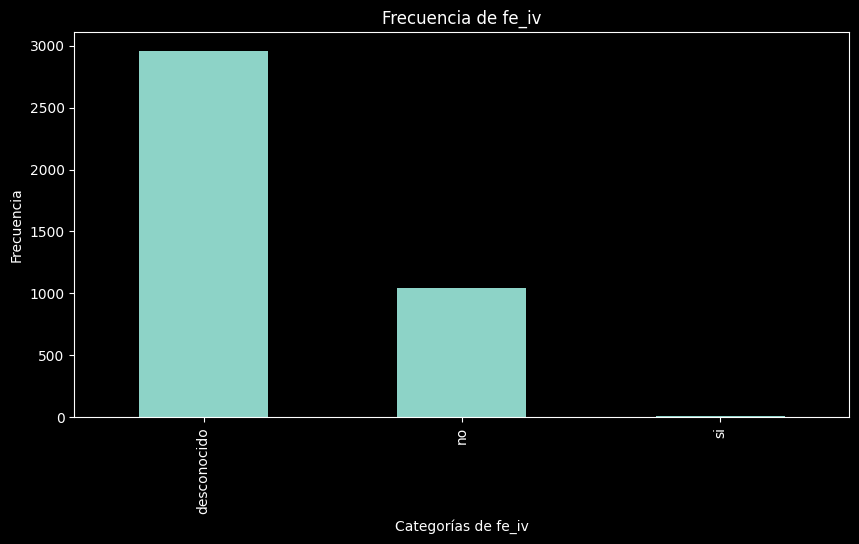

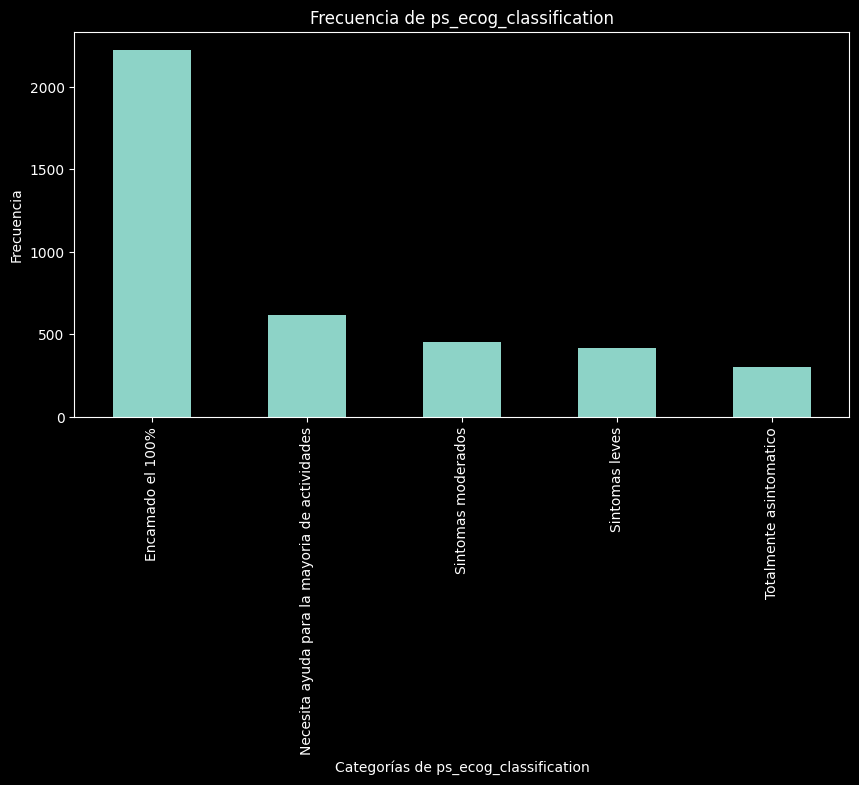

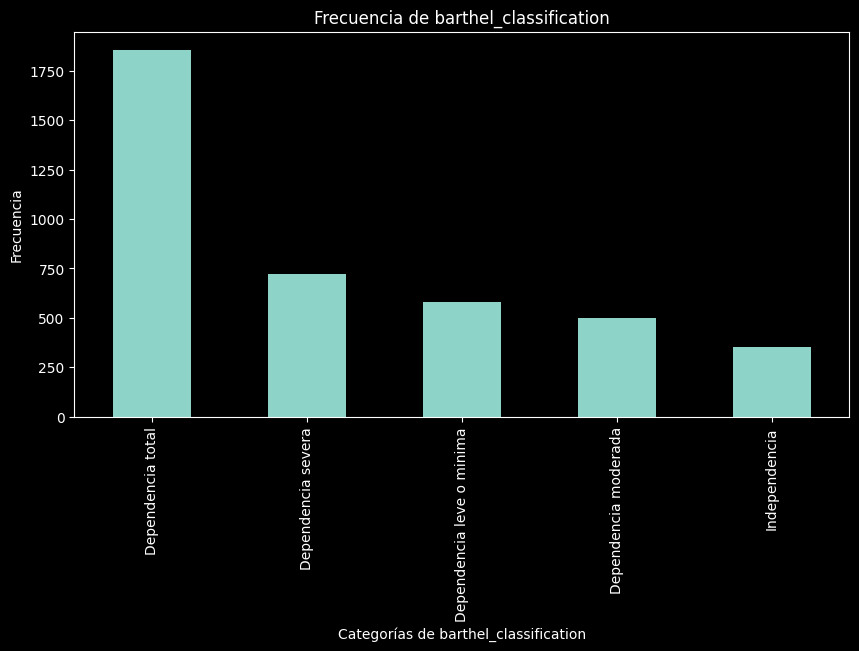

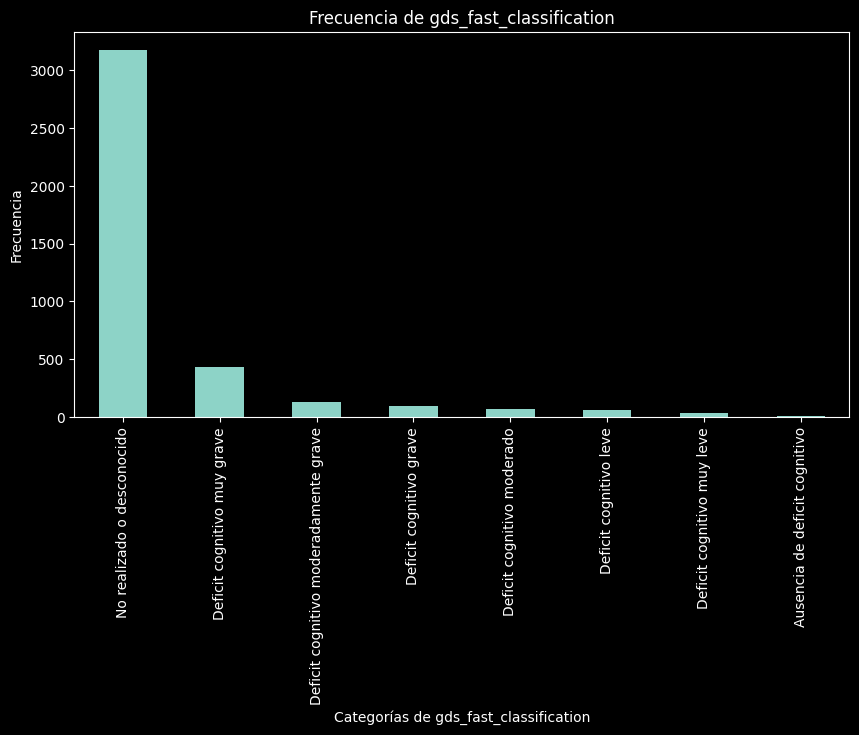

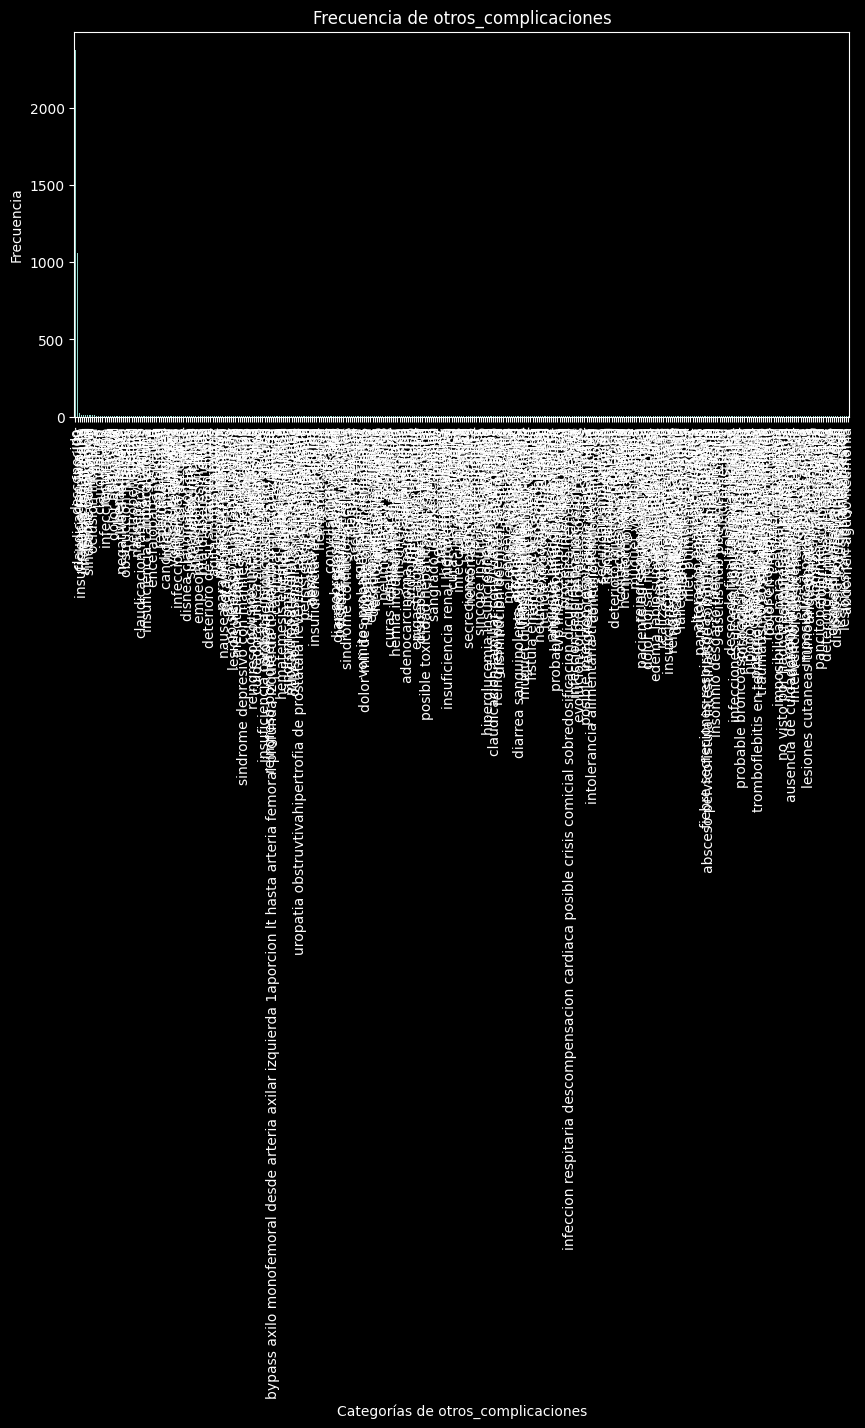

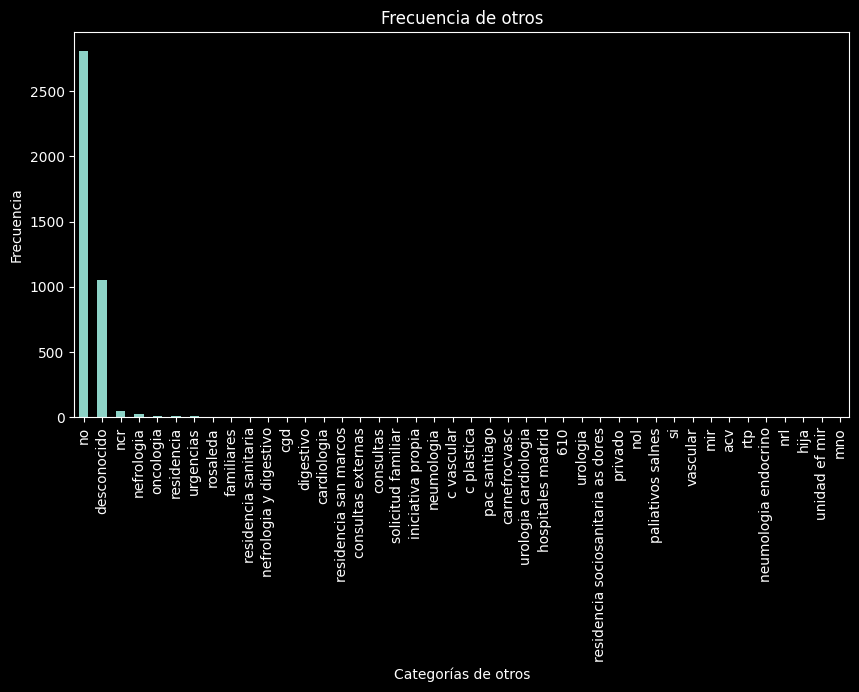

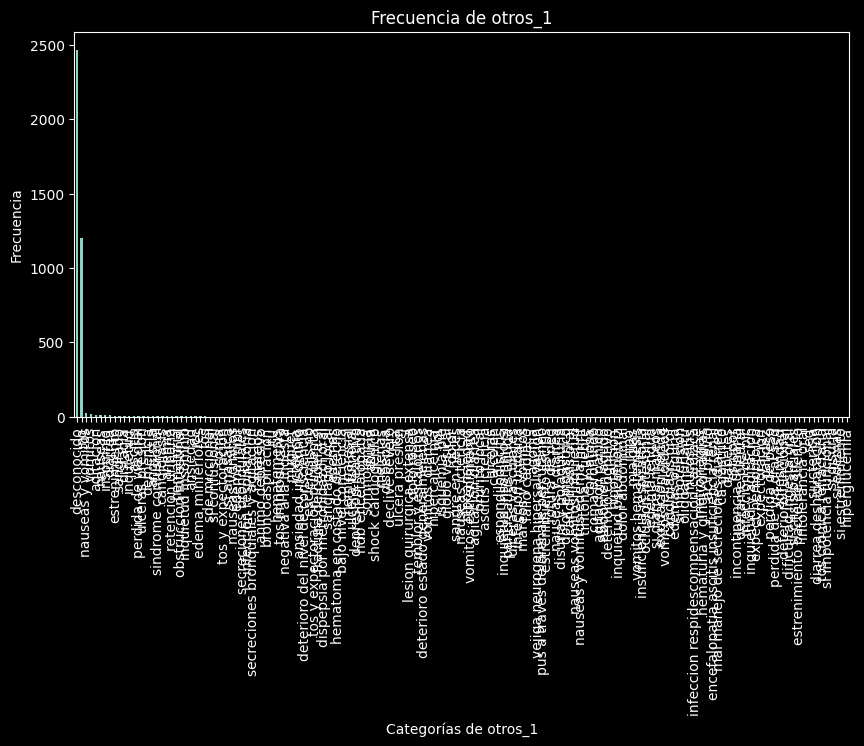

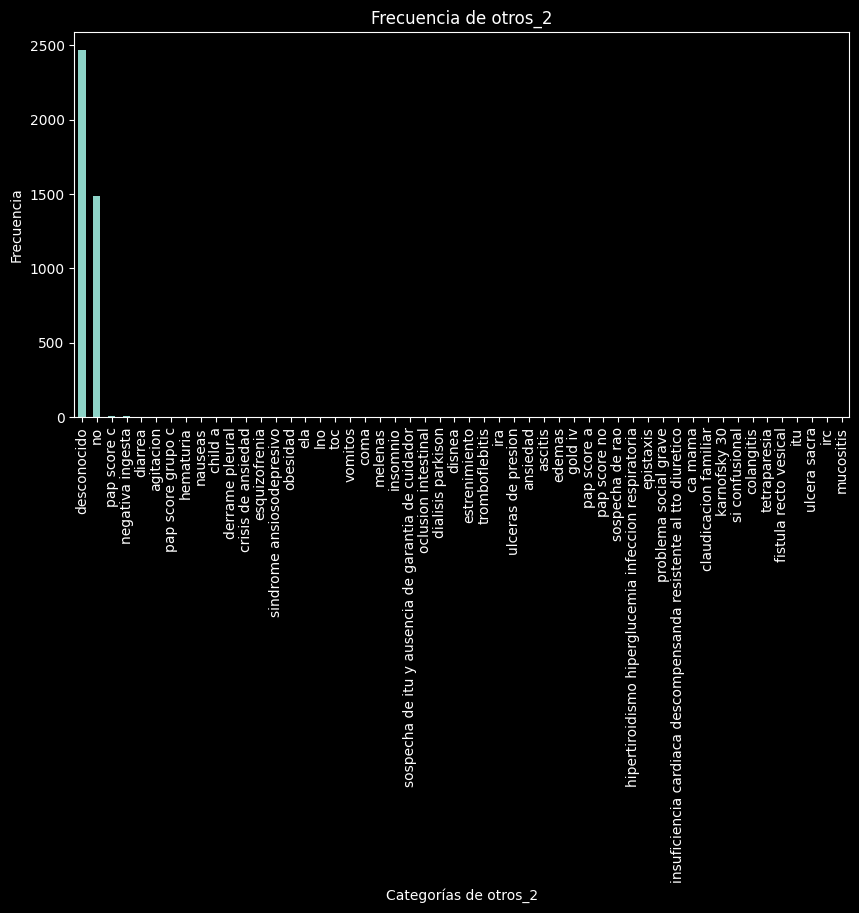

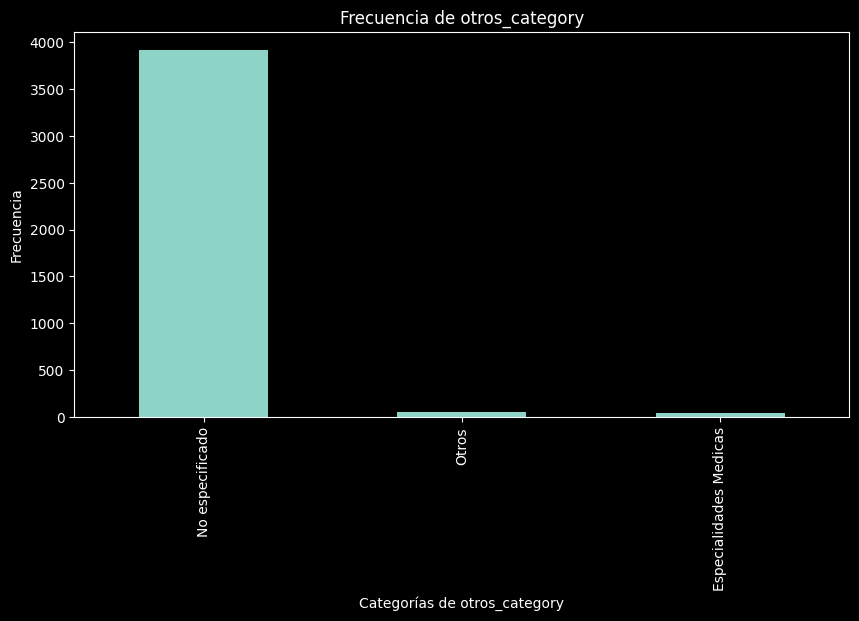

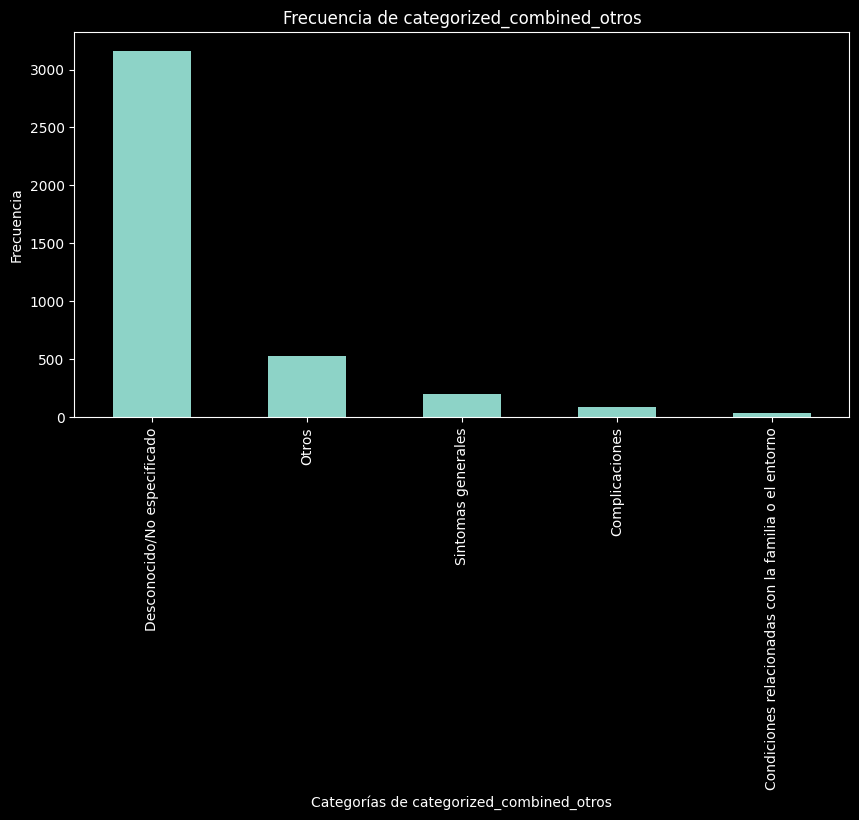

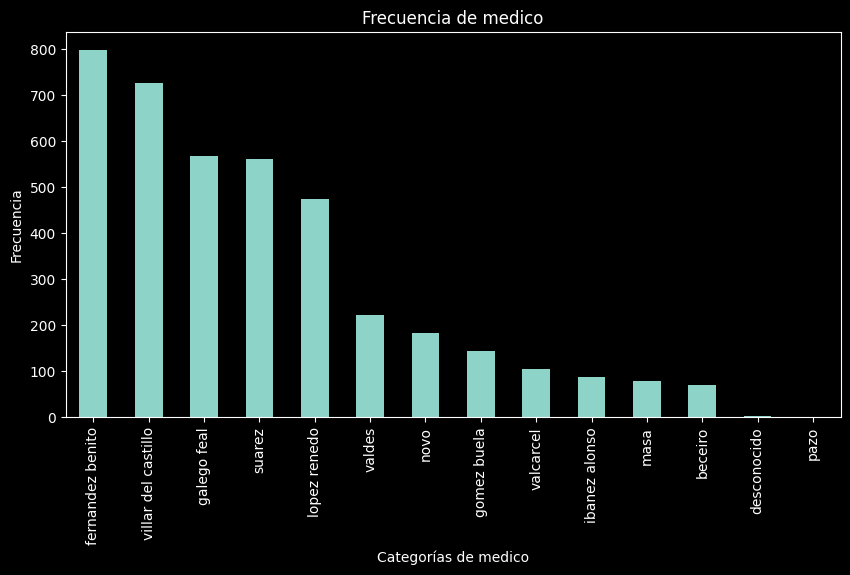

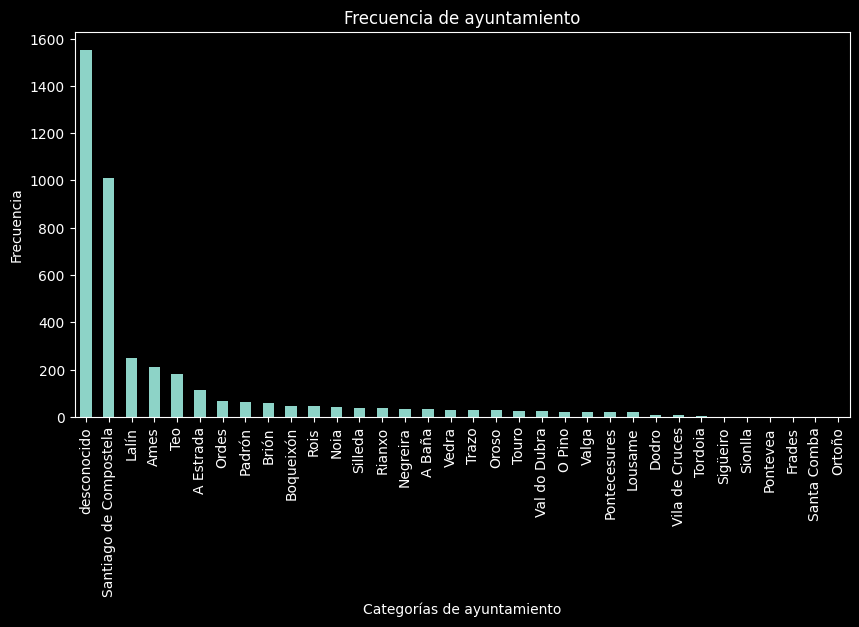

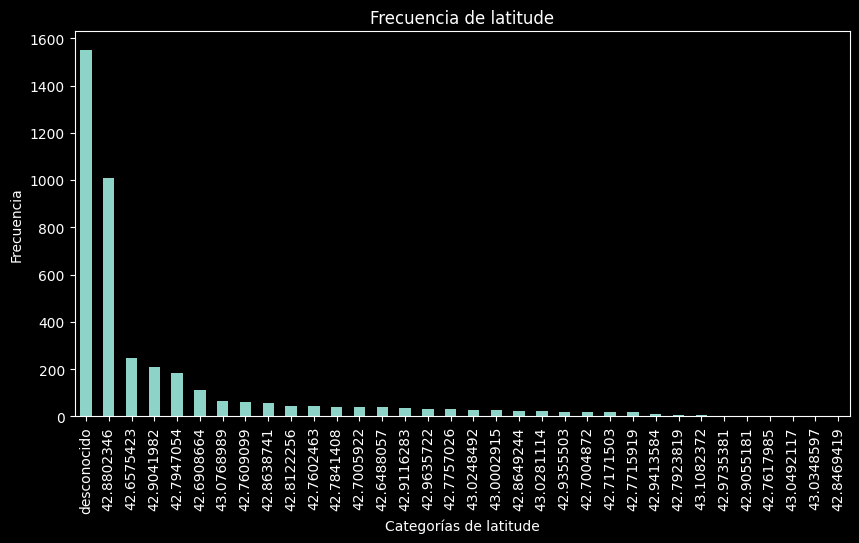

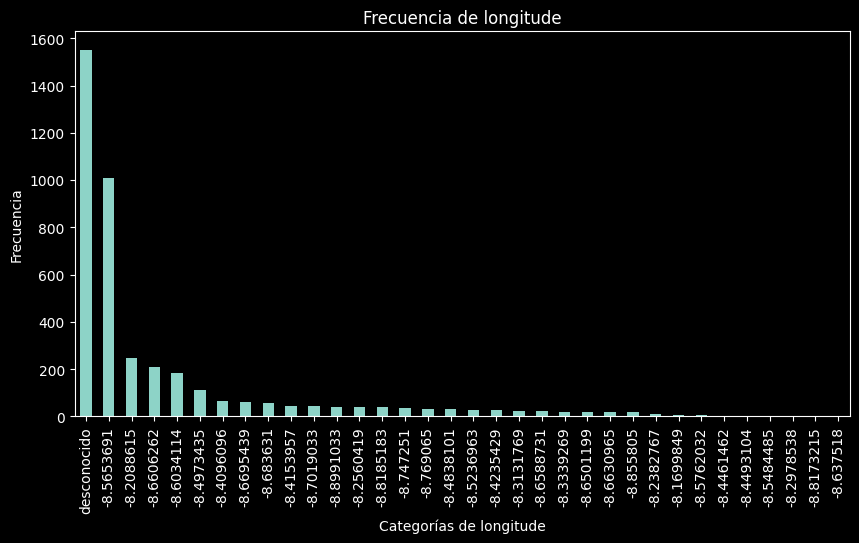

In [45]:
# Lista de columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear un gráfico de barras para cada columna categórica
for col in categorical_columns:
    plt.figure(figsize=(10, 5))  # Tamaño de la figura
    df[col].value_counts().plot(kind='bar')
    plt.title('Frecuencia de {}'.format(col))
    plt.xlabel('Categorías de {}'.format(col))
    plt.ylabel('Frecuencia')
    plt.show()


## 1.2 Porcentaje de cada categoría

In [46]:
[(col,df[col].value_counts(normalize=True)) for col in df]


[
    (
        'h_procedencia',
        clinico                 0.558186
no                      0.311488
conxo                   0.081984
gil casares             0.039123
provincial              0.002990
chuac                   0.001495
residencia              0.001246
si                      0.000748
rosaleda                0.000748
san rafael la coruna    0.000249
lucus augusti           0.000249
quiron la coruna        0.000249
desconocido             0.000249
ap                      0.000249
salnes                  0.000249
hula                    0.000249
pontevedra              0.000249
Name: h_procedencia, dtype: float64
    ),
    (
        'hospital_category',
        Santiago    0.684525
no          0.311737
Otros       0.003738
Name: hospital_category, dtype: float64
    ),
    (
        's_procedencia',
        no                              0.305258
oncologia                       0.134064
mir                             0.120359
urgencias                       0.10341

## 1.3 Filtrar por frecuencias:

In [47]:
# for col in df:
#     value_counts = df[col].value_counts()
#     to_remove = value_counts[value_counts <= 5].index
#     df[col].replace(to_remove, np.nan, inplace=True)

## 1.4 Análisis de frecuencia en relación con la variable objetivo:

In [48]:
pd.crosstab(df['h_procedencia'], df['fiebre'])

fiebre                desconocido    no   si
h_procedencia                               
ap                              0     1    0
chuac                           0     6    0
clinico                         1  1940  299
conxo                           0   288   41
desconocido                     0     1    0
gil casares                     0   141   16
hula                            0     0    1
lucus augusti                   0     1    0
no                              1  1079  170
pontevedra                      0     1    0
provincial                      0    11    1
quiron la coruna                0     0    1
residencia                      0     5    0
rosaleda                        0     3    0
salnes                          0     1    0
san rafael la coruna            0     1    0
si                              0     2    1

In [49]:
for col in df:
    if col != 'diagnostico':
        print(pd.crosstab(df[col], df['diagnostico']))
    else:
        print("You can't crosstab column diagnostico with diagnostico")

diagnostico           ITU  ITU acv  ITU agitacion  ITU anciano fragil  \
h_procedencia                                                           
ap                      0        0              0                   0   
chuac                   1        0              0                   0   
clinico                99        0              0                   0   
conxo                  14        0              0                   0   
desconocido             0        0              0                   0   
gil casares             8        0              0                   0   
hula                    0        0              0                   0   
lucus augusti           0        0              0                   0   
no                     51        2              1                   1   
pontevedra              0        0              0                   0   
provincial              0        0              0                   0   
quiron la coruna        0        0              0  

# 2.Correlation Analysis
Aunque la correlación generalmente se mide entre variables numéricas, también puedes medir la correlación entre variables categóricas utilizando el coeficiente de correlación de Cramér.

In [51]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(df['h_procedencia'], df['s_procedencia'])


0.4141140684372066

In [52]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical_columns = df.select_dtypes(include=['object']).columns
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])


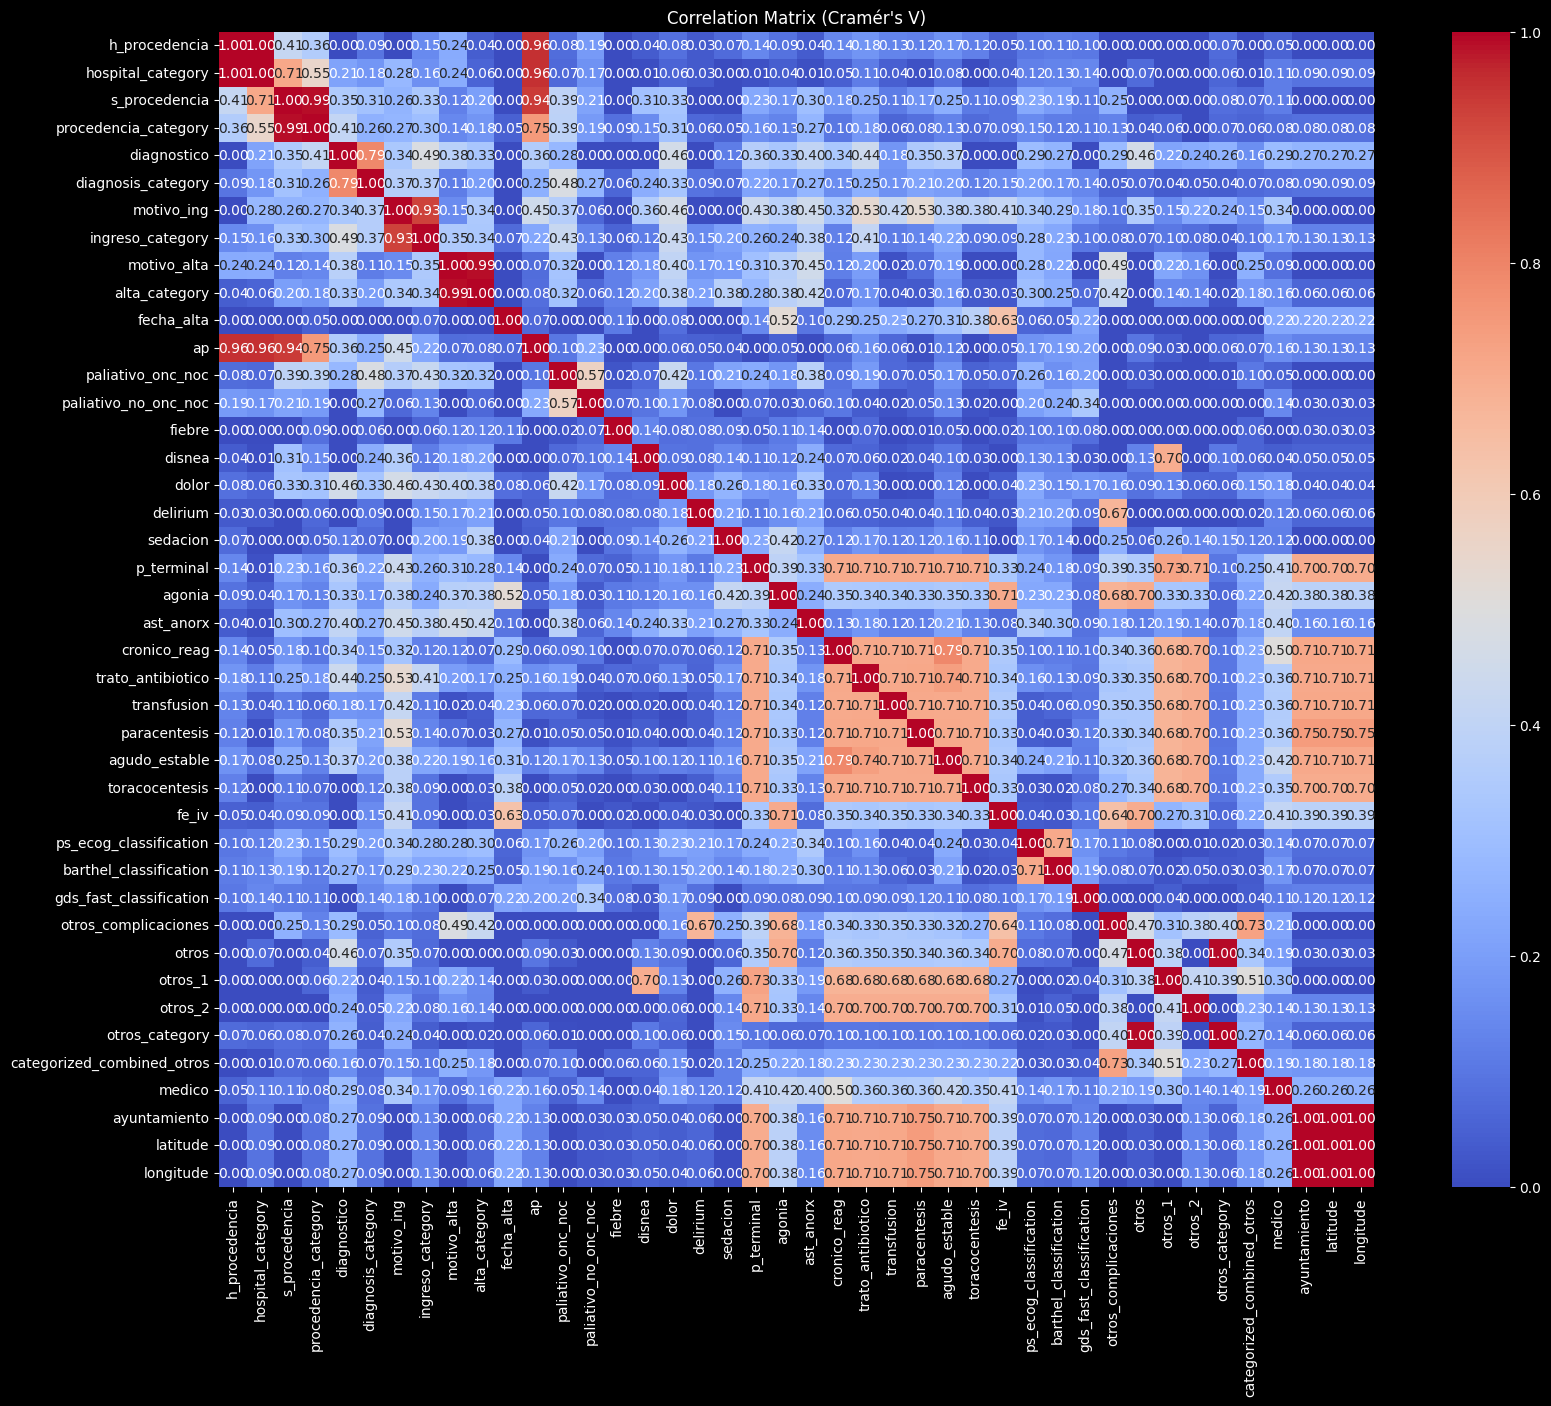

In [53]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix.astype(float), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Cramér\'s V)')
plt.show()

# 3.Codificación One-hot
Este es un proceso mediante el cual las variables categóricas se convierten en una forma que podría ser proporcionada a los algoritmos de machine learning para hacer un mejor trabajo en la predicción. Por ejemplo:
```python
df_dummies = pd.get_dummies(df, columns=['h_procedencia', 's_procedencia'])
```

In [54]:
df_encoded = pd.get_dummies(df, columns=['diagnostico','ap'])

In [55]:
df_encoded.head()

h_procedencia hospital_category s_procedencia procedencia_category  \
0   gil casares          Santiago          upal    Unidad Paliativos   
1       clinico          Santiago     oncologia            Oncologia   
2       clinico          Santiago           mir                  MIR   
3       clinico          Santiago     digestivo            Digestivo   
4       clinico          Santiago     urgencias            Urgencias   

         diagnosis_category                 motivo_ing ingreso_category  \
0     Canceres y neoplasias           control sintomas         Sintomas   
1              Neurologicas          mal control dolor         Sintomas   
2     Canceres y neoplasias          control evolutivo     Evaluaciones   
3  Hepaticas y pancreaticas  administracion octreotido            Otros   
4     Canceres y neoplasias           control sintomas         Sintomas   

    motivo_alta   alta_category fecha_alta  ...  diagnostico_uppesquizofrenia  \
0     reingreso  Complicaciones    unknown  ...                             0   
1        exitus          Exitus    unknown  ...                             0   
2  fin cuidados           Otros    unknown  ...                             0   
3  fin cuidados           Otros    unknown  ...                             0   
4        exitus          Exitus    unknown  ...                             0   

   diagnostico_upps deterioro cognitivo severo  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  diagnostico_upps esclerosis multiple epilepsia  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  diagnostico_valoracion ulceras diagnostico_ventilacion mecanica invasiva  \
0                              0                                         0   
1                              0                                         0   
2                              0                                         0   
3                              0                                         0   
4                              0                                         0   

  diagnostico_vmi por insuficiencia respiratoria  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  diagnostico_vomitos y diarrea cancer colon estadio IV  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

  diagnostico_vomitosneo recto estadio IV ap_no ap_si  
0                                       0     1     0  
1                                       0     1     0  
2                                       0     1     0  
3                                       0     1     0  
4                                       0     1     0  

[5 rows x 1568 columns]

[10/23/23 20:38:28] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_24236\378357754.py:1:                             
                             FutureWarning: The default value of numeric_only in DataFrame.corr is                 
                             deprecated. In a future version, it will default to False. Select only                
                             valid columns or specify the value of numeric_only to silence this                    
                             warning.                                                                              
                               correlation_matrix = df_encoded.corr()                                              
                                                                                                                   

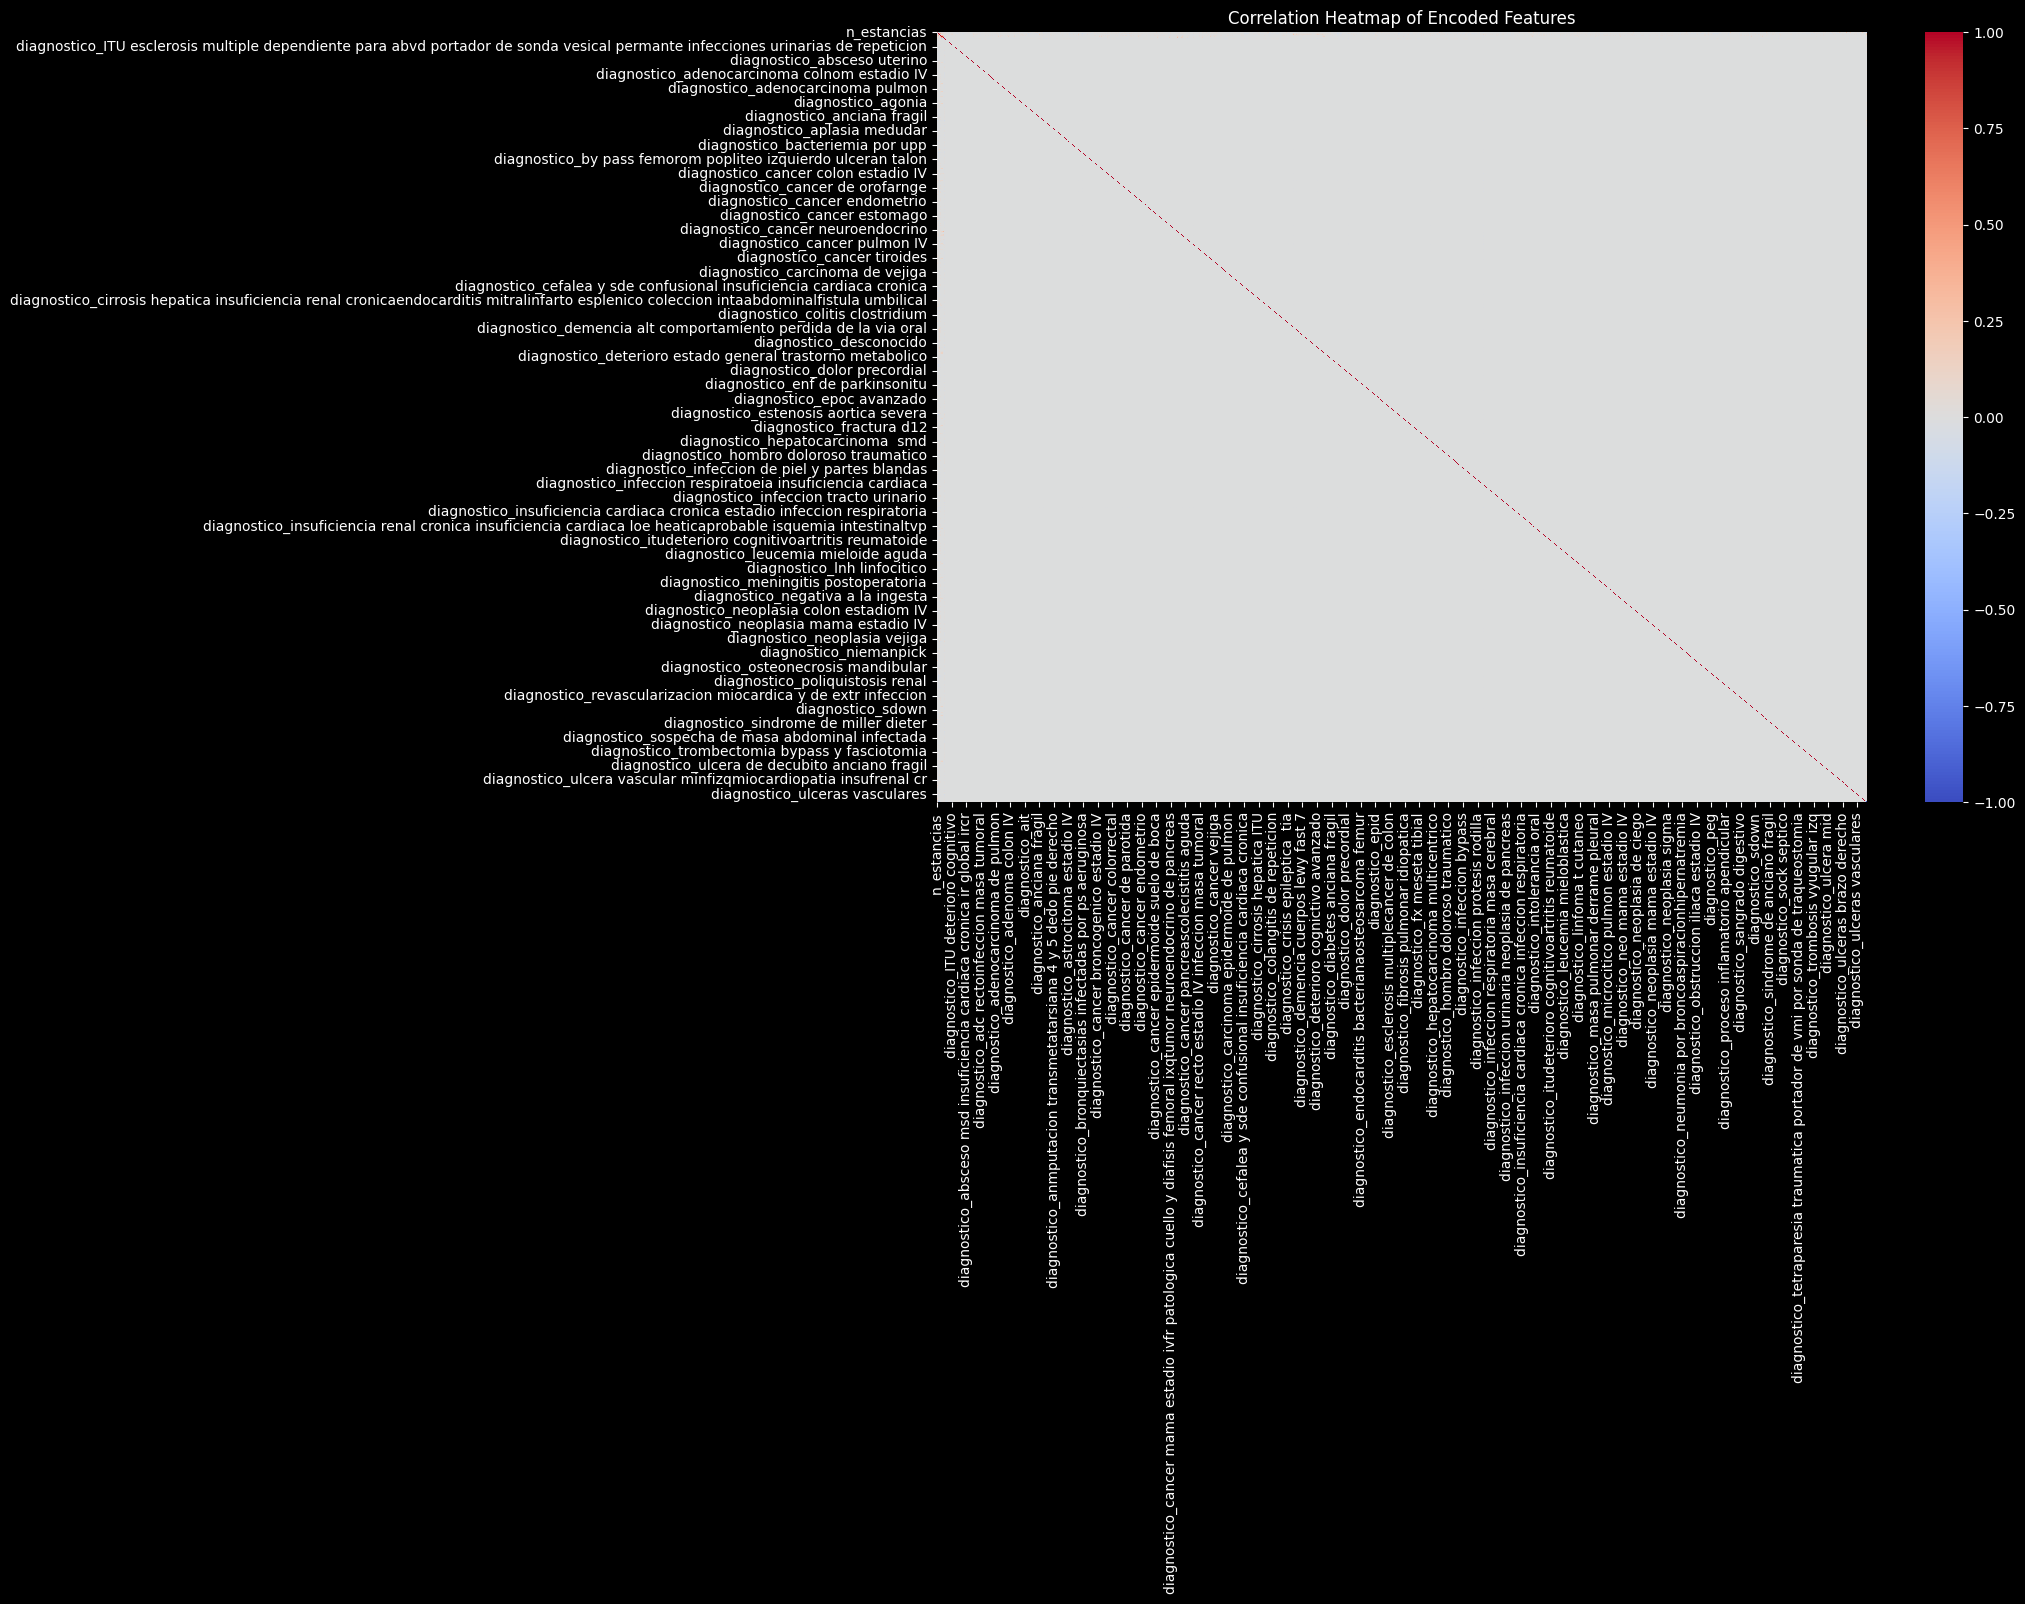

In [57]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Encoded Features')
plt.show()


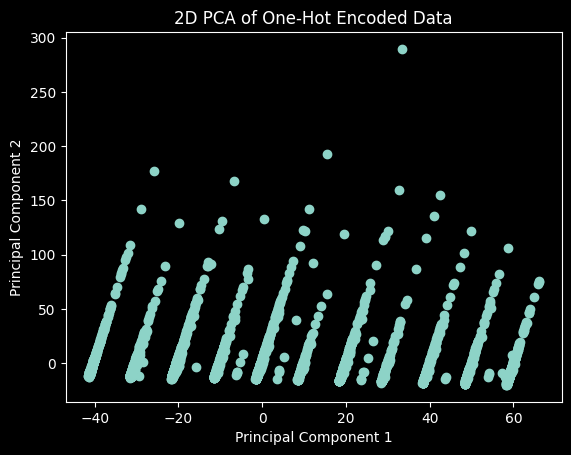

In [59]:
pca = PCA(n_components=2)
df_encoded_num = df_encoded.select_dtypes(exclude='object')
pca_result = pca.fit_transform(df_encoded_num)

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of One-Hot Encoded Data')
plt.show()


# 4.Feature Hashing

Esta es una técnica inteligente para codificar categorías en un número limitado de dimensiones. Cuando la cardinalidad (número de valores únicos) es muy alta, one-hot encoding puede aumentar la dimensionalidad demasiado y puede causar problemas de memoria. El hashing trick proporciona una solución a este problema.
`from sklearn.feature_extraction import FeatureHasher`

In [68]:
# Número de características que quieres después de la transformación
n_features = 10

# Crear el hasher
hasher = FeatureHasher(n_features=n_features, input_type='string')

# Aplicar la transformación a las columnas deseadas
hashed_features = hasher.transform(df['diagnostico'].str.split().values)

# Convertir a DataFrame
hashed_features = pd.DataFrame(hashed_features.toarray())

hashed_features

0    1    2    3    4    5    6    7    8    9
0     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
1     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0
2     0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3     0.0  1.0  0.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0
4     0.0  0.0  0.0 -1.0  0.0  0.0  0.0 -2.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
4008  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -2.0  0.0  2.0
4009  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
4010  0.0  0.0  0.0 -1.0  0.0  0.0 -1.0  0.0  0.0  0.0
4011  0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0
4012  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0

[4013 rows x 10 columns]

In [69]:
df_hashed = df.copy()

df_hashed = df_hashed.drop(columns=['diagnostico'])

df_hashed = pd.concat([df_hashed, hashed_features], axis=1)

df_hashed.head()

h_procedencia hospital_category s_procedencia procedencia_category  \
0   gil casares          Santiago          upal    Unidad Paliativos   
1       clinico          Santiago     oncologia            Oncologia   
2       clinico          Santiago           mir                  MIR   
3       clinico          Santiago     digestivo            Digestivo   
4       clinico          Santiago     urgencias            Urgencias   

         diagnosis_category                 motivo_ing ingreso_category  \
0     Canceres y neoplasias           control sintomas         Sintomas   
1              Neurologicas          mal control dolor         Sintomas   
2     Canceres y neoplasias          control evolutivo     Evaluaciones   
3  Hepaticas y pancreaticas  administracion octreotido            Otros   
4     Canceres y neoplasias           control sintomas         Sintomas   

    motivo_alta   alta_category fecha_alta  ...    0    1    2    3    4    5  \
0     reingreso  Complicaciones    unknown  ...  0.0  0.0  0.0  0.0  0.0  1.0   
1        exitus          Exitus    unknown  ...  0.0  0.0  0.0  1.0  0.0  1.0   
2  fin cuidados           Otros    unknown  ...  0.0 -1.0  0.0  0.0  0.0  0.0   
3  fin cuidados           Otros    unknown  ...  0.0  1.0  0.0  0.0  0.0  0.0   
4        exitus          Exitus    unknown  ...  0.0  0.0  0.0 -1.0  0.0  0.0   

     6    7    8    9  
0  0.0  0.0  0.0  1.0  
1  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  1.0  
3  0.0 -1.0  0.0  0.0  
4  0.0 -2.0  1.0  1.0  

[5 rows x 64 columns]

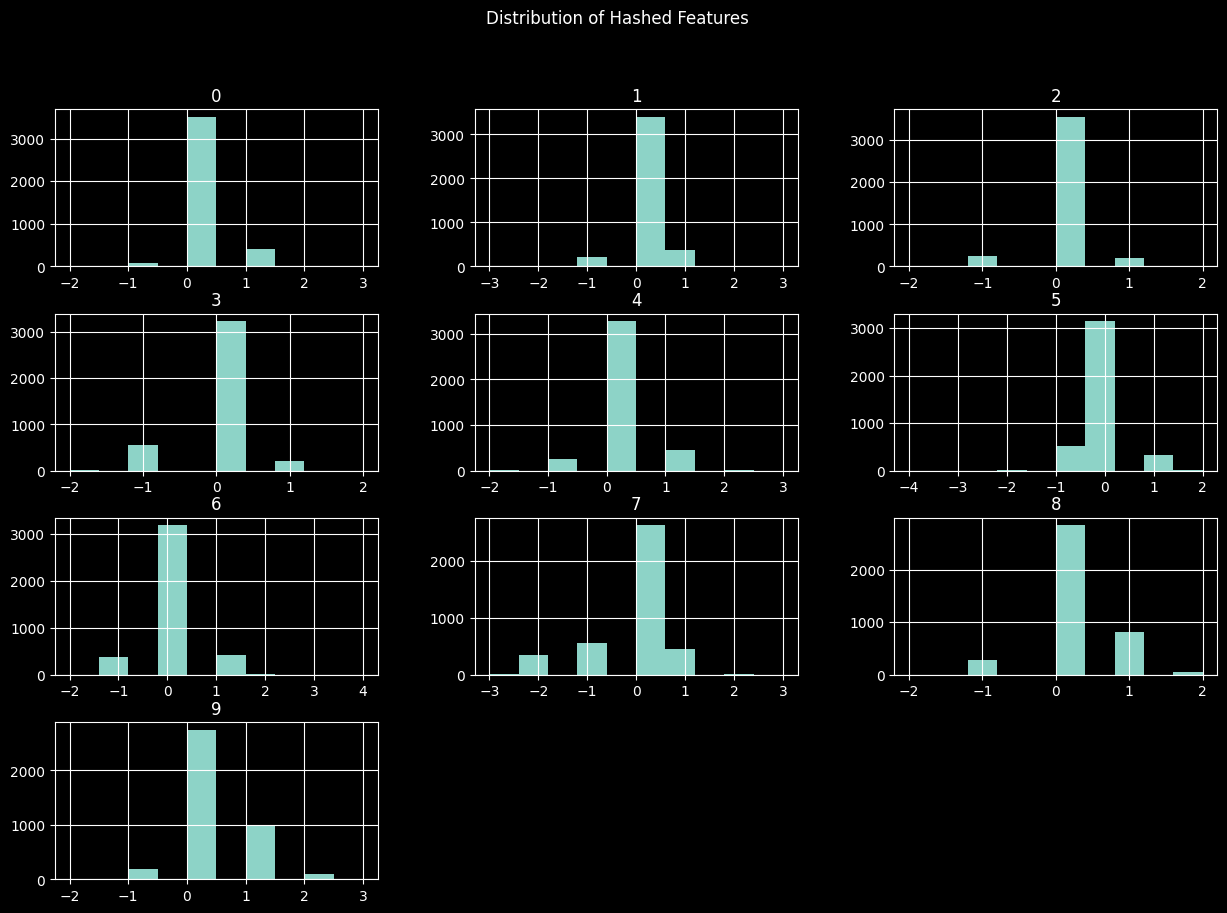

In [71]:
hashed_features.hist(figsize=(15,10))
plt.suptitle('Distribution of Hashed Features')
plt.show()

[10/23/23 20:49:07] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_24236\3881684689.py:1:                            
                             FutureWarning: The default value of numeric_only in DataFrame.corr is                 
                             deprecated. In a future version, it will default to False. Select only                
                             valid columns or specify the value of numeric_only to silence this                    
                             warning.                                                                              
                               correlation_matrix = df_hashed.corr()                                               
                                                                                                                   

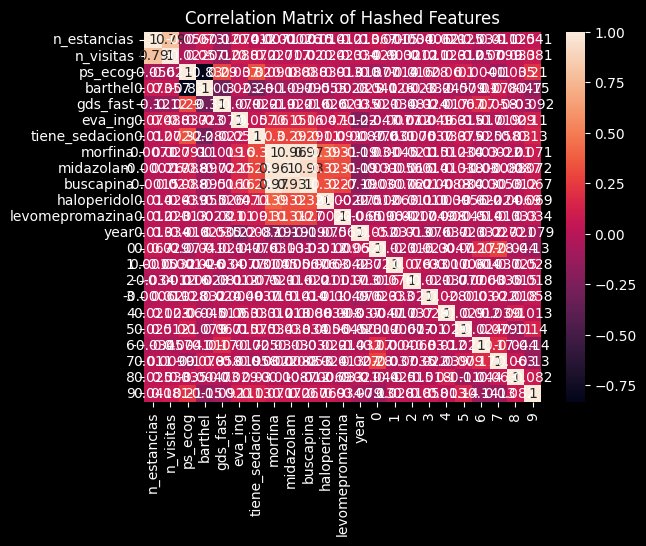

In [72]:
correlation_matrix = df_hashed.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Hashed Features')
plt.show()

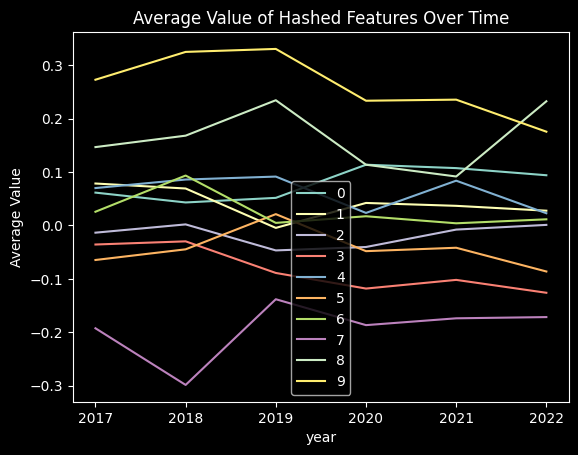

In [73]:
df_hashed.groupby('year')[hashed_features.columns].mean().plot(kind='line')
plt.ylabel('Average Value')
plt.title('Average Value of Hashed Features Over Time')
plt.show()

In [74]:
for col in hashed_features.columns:
    print(hashed_features[col].value_counts())

 0.0    3513
 1.0     400
-1.0      82
 2.0      12
-2.0       5
 3.0       1
Name: 0, dtype: int64
 0.0    3401
 1.0     384
-1.0     205
-2.0      14
 2.0       7
 3.0       1
-3.0       1
Name: 1, dtype: int64
 0.0    3557
-1.0     241
 1.0     199
-2.0      12
 2.0       4
Name: 2, dtype: int64
 0.0    3226
-1.0     554
 1.0     214
-2.0      15
 2.0       4
Name: 3, dtype: int64
 0.0    3277
 1.0     458
-1.0     250
 2.0      18
-2.0       9
 3.0       1
Name: 4, dtype: int64
 0.0    3144
-1.0     518
 1.0     332
-2.0      12
 2.0       5
-4.0       1
-3.0       1
Name: 5, dtype: int64
 0.0    3174
 1.0     429
-1.0     378
 2.0      25
-2.0       6
 4.0       1
Name: 6, dtype: int64
 0.0    2627
-1.0     556
 1.0     454
-2.0     344
 2.0      18
-3.0       9
 3.0       5
Name: 7, dtype: int64
 0.0    2839
 1.0     822
-1.0     282
 2.0      66
-2.0       4
Name: 8, dtype: int64
 0.0    2747
 1.0     988
-1.0     180
 2.0      92
-2.0       4
 3.0       2
Name: 9, dtype: int64


# 5.Encoding Categorical Data

* We can not load our Machine Learning Model with Categorical Data because ML Models can not understand String Data
  
* We must use technique to encode the Categorical Columns. there are many Techniques : LabelEncoding, One-hot-Encoding, TargetMeanEncoding and many more.
  
* We will Encode the Categorical Columns on the Basis of the Frequency distribution (Cardinality)
* We Use One-hot-Encoding for low Cardinality Columns and will use LabelEncoding for High Cardinality Columns.
* One-hot-Encoding: it is a type of encoding in which we create new columns with the values of that categorical column and assign 1 for yes and 0 for no. Like Column Side have two values S and P. it will create two columns S and P and then assign 1 and 0 in S and also Same for P.
* LabelEncoding: it is used when we have high cardinality column because if we have column which have 2000 different unique values in string, then we can not use one-hot-encoding beacause it will create 2000 columns which will be harder for us. so, we use LabelEncoding which encode on that column in which we are working on. it will assign numbers to every unique string in that particular column.

In [75]:
le = LabelEncoder()

# print(pd.get_dummies(cat_data))
# print(le.fit_transform(cat_data))


# 6.Lazy Predict

In [88]:
df_encoded.columns


Index(['h_procedencia', 'hospital_category', 's_procedencia',
       'procedencia_category', 'diagnosis_category', 'motivo_ing',
       'ingreso_category', 'motivo_alta', 'alta_category', 'fecha_alta',
       ...
       'diagnostico_uppesquizofrenia',
       'diagnostico_upps deterioro cognitivo severo',
       'diagnostico_upps esclerosis multiple epilepsia',
       'diagnostico_valoracion ulceras',
       'diagnostico_ventilacion mecanica invasiva',
       'diagnostico_vmi por insuficiencia respiratoria',
       'diagnostico_vomitos y diarrea cancer colon estadio IV',
       'diagnostico_vomitosneo recto estadio IV', 'ap_no', 'ap_si'],
      dtype='object', length=1568)

In [93]:
# Creating our target variable
target = 'motivo_alta'
y = df_encoded[target]
X = df_encoded.drop(columns=target)
                     
# Splitting our data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
classifiers = LazyClassifier(ignore_warnings=True, custom_metric=None, verbose=False)
models,predictions = classifiers.fit(X_train, X_test, y_train, y_test)
print(models)

 97%|█████████▋| 28/29 [03:44<00:03,  3.53s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 3210, number of used features: 142
[LightGBM] [Info] Start training from score -8.074026
[LightGBM] [Info] Start training from score -8.074026
[LightGBM] [Info] Start training from score -6.687732
[LightGBM] [Info] Start training from score -7.380879
[LightGBM] [Info] Start training from score -8.074026
[LightGBM] [Info] Start training from score -8.074026
[LightGBM] [Info] Start training from score -8.074026
[LightGBM] [Info] Start training from score -8.074026
[LightGBM] [Info] Start training from score -8.074026
[LightGBM] [Info] Start training from score -8.074026
[LightGBM] [Info] Start training from score -8.074026
[LightGBM] [Info] Start training from score -8.074026
[LightGBM] [Info] Start training from score -1.216512
[Light

100%|██████████| 29/29 [03:48<00:00,  7.87s/it]

Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []


# Interpretación de los modelos:
A partir de los resultados, el **LGBMClassifier**, **ExtraTreesClassifier**, **BaggingClassifier** y **RandomForestClassifier** están liderando en términos de ***precisión*** y ***F1 Score***. Sin embargo, es importante notar que el equilibrio entre clases puede afectar estos valores. Es por eso que es **crucial no depender únicamente de la precisión**, sino **también considerar otras métricas**, especialmente si se está tratando con **clases desbalanceadas**.